In [1]:
%load_ext autoreload
%autoreload 2


In [2]:
import os
google_colab = input('Running on Colab?\n')
if google_colab == 'yes' : 
    BASE_DIR = 'University/UC3M/TFM/cnp_repo/neural-processes'

    # Load the Drive helper and mount
    from google.colab import drive

    # This will prompt for authorization.
    drive.mount('/content/drive')

      # Change to assignment directory ('Lab_Exercises_DASS/Lab_Exercise4' by default)
    import os
    os.chdir(f'/content/drive/My Drive/{BASE_DIR}')
    
else:
    import sys, os 
    BASE_DIR = '/'.join(os.getcwd().split('/')[:-1])
    sys.path.append(BASE_DIR)
    print(f'Top level directory is set to {BASE_DIR}')
    os.chdir(BASE_DIR)

    
# custom imports
from cnp.trainer import RegressionTrainer
from cnp.datageneration import DataGenerator
from cnp.helpers import Helper
from cnp.cnp import RegressionCNP

import torch
import numpy as np

# import utils
import json
from datetime import date

Running on Colab?

Top level directory is set to /Users/frederik/Google Drive/University/UC3M/TFM/cnp_repo/neural-processes


In [3]:

# we first get the variables for the configuration file
os.environ["CHECKPOINT_DIR"] = "checkpoints"
os.environ["MODEL_PARAMS"] = "default"

CHECKPOINT_DIR = os.environ['CHECKPOINT_DIR']
MODEL_PARAMS = os.environ['MODEL_PARAMS']

if google_colab=='yes':
    config_dir = 'configs'
else:
    config_dir = os.path.join(BASE_DIR,'configs')



## Simple aggregation using the mean

In [4]:
with open(os.path.join(config_dir,'1d_polynomial_compare_simple_aggregation.json')) as f:
    file = f.read()
    default_conf = json.loads(file)

# checking whether CUDA is available 
train_on_gpu = torch.cuda.is_available()
if(train_on_gpu):
    print('Training on GPU!')
    default_conf['experiment_params']['train_on_gpu'] = True
else: 
    print('No GPU available, training on CPU')
    default_conf['experiment_params']['train_on_gpu'] = False

No GPU available, training on CPU


In [5]:
default_conf

{'cnp_params': {'dimout': 2,
  'dimr': 128,
  'dimx': 1,
  'dimy': 1,
  'dropout': 0,
  'max_contx': 10,
  'max_funcs': 10,
  'min_contx': 3,
  'min_funcs': 2,
  'fix_num_contxt': False,
  'num_layers_decoder': 3,
  'num_layers_encoder': 4,
  'num_neurons_decoder': 128,
  'num_neurons_encoder': 128,
  'aggregation_kwargs': {'aggregator': None,
   'simple_aggregator_type': 'mean'}},
 'data_kwargs': {'datagenerator': 'cnp.datageneration.PolynomialRegression',
  'mu': 0,
  'sigma': 2,
  'num_instances_train': 64,
  'num_instances_vali': 1,
  'num_instances_test': 1},
 'experiment_params': {'dim_observation': 50,
  'lr': 0.001,
  'n_epochs': 10000,
  'range_x': [-2, 2],
  'seed': None,
  'dimx': 1,
  'train_on_gpu': False},
 'train_kwargs': {'batch_size_train': 64,
  'batch_size_vali': 1,
  'batch_size_test': 1,
  'plotting': True,
  'print_after': 100}}

In [12]:
CondNeuralProcess = RegressionCNP(**default_conf['cnp_params'])

Decoder(
  (_process_input): Sequential(
    (0): Linear(in_features=129, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=2, bias=True)
  )
)
Encoder(
  (_process_input): Sequential(
    (0): Linear(in_features=2, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=128, bias=True)
    (5): ReLU()
    (6): Linear(in_features=128, out_features=128, bias=True)
  )
)


In [14]:
trainer = RegressionTrainer(
    cnp=CondNeuralProcess,
    data_kwargs=default_conf['data_kwargs'],
    **default_conf['experiment_params'])
                         

  0%|          | 0/10000 [00:00<?, ?it/s]

Mean training loss at epoch 0 :                         29.612
Mean Validation loss after 0 equals                     111.852

Validation loss for the function plotted:                 111.852


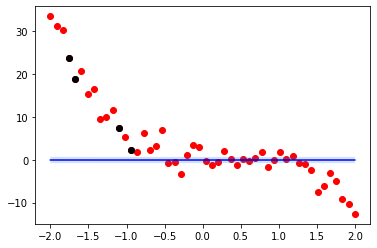

  1%|          | 95/10000 [00:01<03:14, 50.94it/s]

Mean training loss at epoch 100 :                         3.364
Mean Validation loss after 100 equals                     3.508

Validation loss for the function plotted:                 3.508


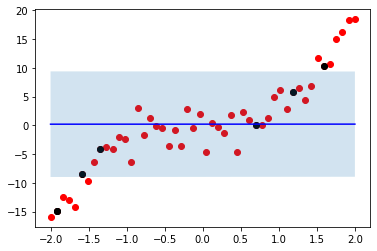

  2%|▏         | 199/10000 [00:03<02:20, 69.78it/s]

Mean training loss at epoch 200 :                         3.349
Mean Validation loss after 200 equals                     3.235

Validation loss for the function plotted:                 3.235


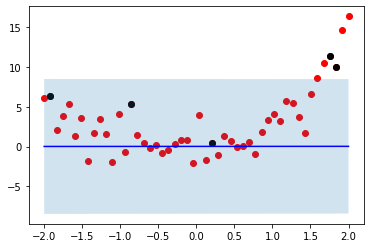

  3%|▎         | 299/10000 [00:05<02:30, 64.31it/s]

Mean training loss at epoch 300 :                         3.234
Mean Validation loss after 300 equals                     3.236

Validation loss for the function plotted:                 3.236


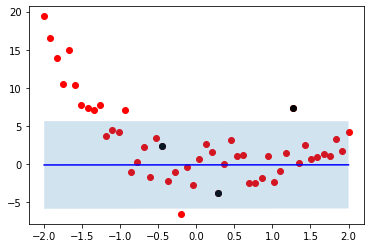

  4%|▍         | 399/10000 [00:07<02:16, 70.46it/s]

Mean training loss at epoch 400 :                         2.684
Mean Validation loss after 400 equals                     2.613

Validation loss for the function plotted:                 2.613


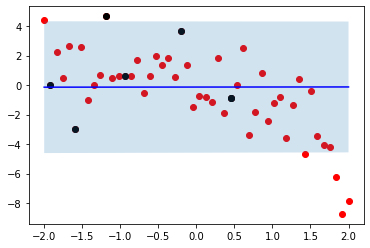

  5%|▍         | 497/10000 [00:09<02:53, 54.87it/s]

Mean training loss at epoch 500 :                         2.799
Mean Validation loss after 500 equals                     2.493

Validation loss for the function plotted:                 2.493


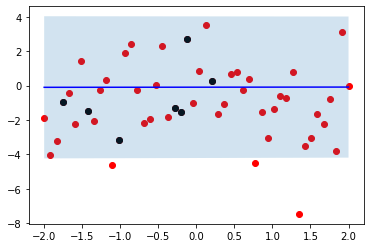

  6%|▌         | 597/10000 [00:12<06:18, 24.82it/s]

Mean training loss at epoch 600 :                         3.531
Mean Validation loss after 600 equals                     2.896

Validation loss for the function plotted:                 2.896


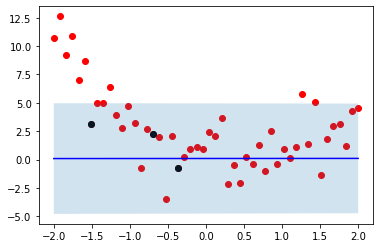

  7%|▋         | 696/10000 [00:14<03:37, 42.78it/s]

Mean training loss at epoch 700 :                         3.129
Mean Validation loss after 700 equals                     3.208

Validation loss for the function plotted:                 3.208


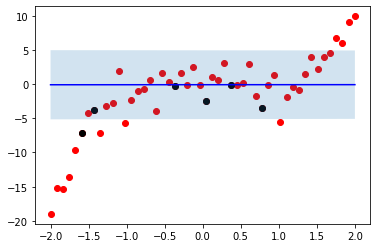

  8%|▊         | 798/10000 [00:16<02:36, 58.81it/s]

Mean training loss at epoch 800 :                         3.611
Mean Validation loss after 800 equals                     4.291

Validation loss for the function plotted:                 4.291


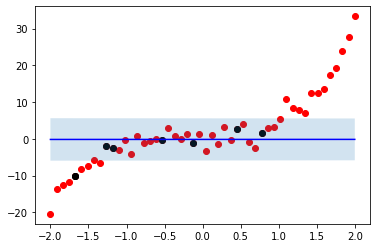

  9%|▉         | 895/10000 [00:19<03:53, 39.05it/s]

Mean training loss at epoch 900 :                         3.281
Mean Validation loss after 900 equals                     4.884

Validation loss for the function plotted:                 4.884


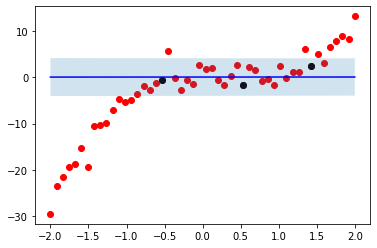

 10%|▉         | 998/10000 [00:21<03:14, 46.27it/s]

Mean training loss at epoch 1000 :                         3.228
Mean Validation loss after 1000 equals                     3.261

Validation loss for the function plotted:                 3.261


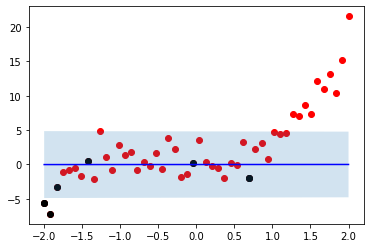

 11%|█         | 1095/10000 [00:24<04:26, 33.41it/s]

Mean training loss at epoch 1100 :                         3.265
Mean Validation loss after 1100 equals                     3.509

Validation loss for the function plotted:                 3.509


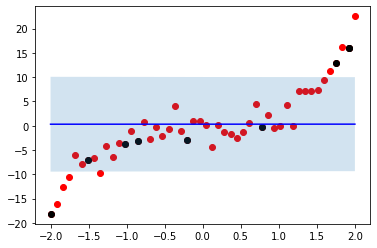

 12%|█▏        | 1199/10000 [00:27<05:23, 27.19it/s]

Mean training loss at epoch 1200 :                         3.44
Mean Validation loss after 1200 equals                     2.699

Validation loss for the function plotted:                 2.699


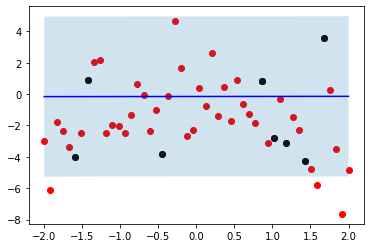

 13%|█▎        | 1298/10000 [00:29<02:36, 55.77it/s]

Mean training loss at epoch 1300 :                         3.357
Mean Validation loss after 1300 equals                     3.562

Validation loss for the function plotted:                 3.562


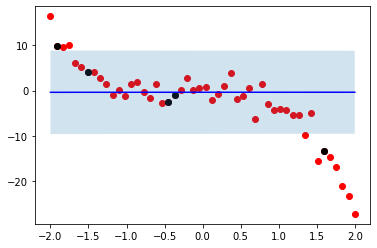

 14%|█▍        | 1397/10000 [00:31<02:19, 61.89it/s]

Mean training loss at epoch 1400 :                         3.352
Mean Validation loss after 1400 equals                     3.447

Validation loss for the function plotted:                 3.447


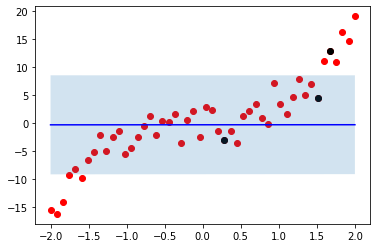

 15%|█▍        | 1494/10000 [00:33<02:13, 63.51it/s]

Mean training loss at epoch 1500 :                         3.02
Mean Validation loss after 1500 equals                     3.61

Validation loss for the function plotted:                 3.61


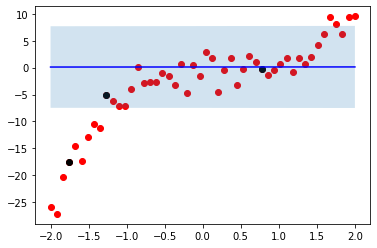

 16%|█▌        | 1594/10000 [00:35<02:09, 64.72it/s]

Mean training loss at epoch 1600 :                         2.967
Mean Validation loss after 1600 equals                     3.225

Validation loss for the function plotted:                 3.225


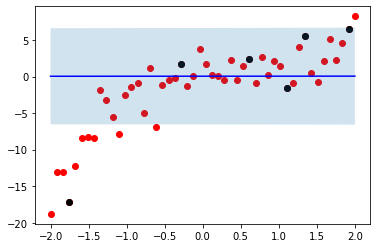

 17%|█▋        | 1693/10000 [00:36<02:10, 63.66it/s]

Mean training loss at epoch 1700 :                         2.842
Mean Validation loss after 1700 equals                     2.865

Validation loss for the function plotted:                 2.865


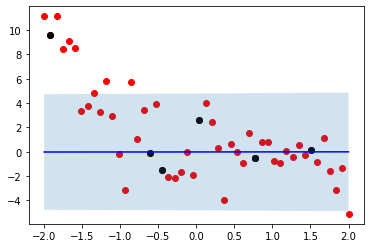

 18%|█▊        | 1796/10000 [00:38<02:12, 62.14it/s]

Mean training loss at epoch 1800 :                         3.466
Mean Validation loss after 1800 equals                     2.763

Validation loss for the function plotted:                 2.763


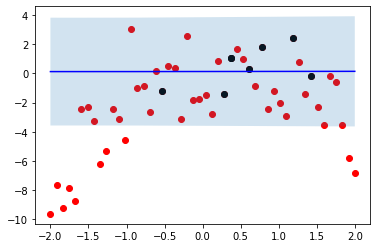

 19%|█▉        | 1895/10000 [00:40<02:07, 63.57it/s]

Mean training loss at epoch 1900 :                         2.997
Mean Validation loss after 1900 equals                     3.13

Validation loss for the function plotted:                 3.13


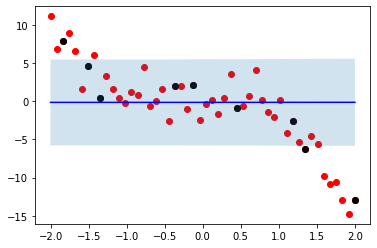

 20%|█▉        | 1995/10000 [00:42<02:00, 66.55it/s]

Mean training loss at epoch 2000 :                         3.264
Mean Validation loss after 2000 equals                     3.45

Validation loss for the function plotted:                 3.45


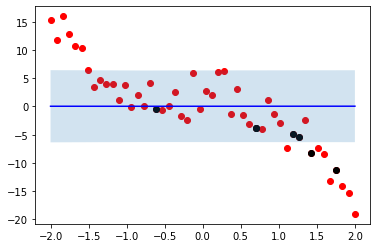

 21%|██        | 2100/10000 [00:43<02:05, 62.86it/s]

Mean training loss at epoch 2100 :                         3.077
Mean Validation loss after 2100 equals                     3.51

Validation loss for the function plotted:                 3.51


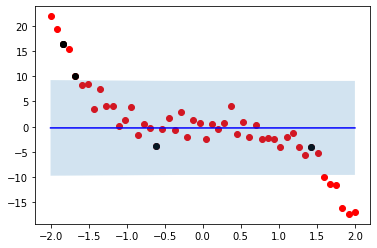

 22%|██▏       | 2199/10000 [00:45<02:05, 62.00it/s]

Mean training loss at epoch 2200 :                         3.621
Mean Validation loss after 2200 equals                     3.126

Validation loss for the function plotted:                 3.126


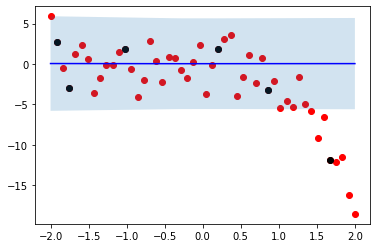

 23%|██▎       | 2299/10000 [00:47<02:00, 63.69it/s]

Mean training loss at epoch 2300 :                         3.663
Mean Validation loss after 2300 equals                     3.263

Validation loss for the function plotted:                 3.263


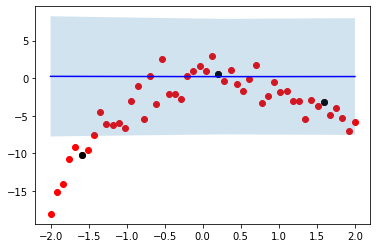

 24%|██▍       | 2399/10000 [00:49<02:33, 49.49it/s]

Mean training loss at epoch 2400 :                         3.24
Mean Validation loss after 2400 equals                     3.152

Validation loss for the function plotted:                 3.152


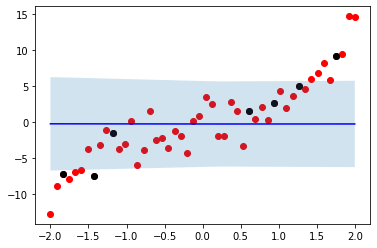

 25%|██▍       | 2494/10000 [00:51<02:02, 61.30it/s]

Mean training loss at epoch 2500 :                         3.267
Mean Validation loss after 2500 equals                     2.913

Validation loss for the function plotted:                 2.913


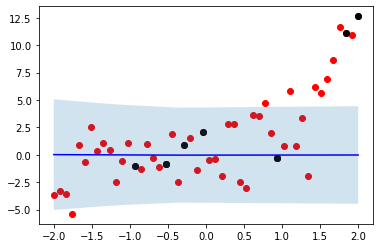

 26%|██▌       | 2598/10000 [00:52<01:53, 65.05it/s]

Mean training loss at epoch 2600 :                         3.325
Mean Validation loss after 2600 equals                     4.248

Validation loss for the function plotted:                 4.248


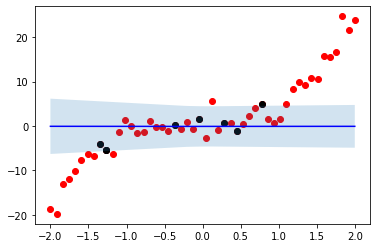

 27%|██▋       | 2696/10000 [00:54<01:53, 64.60it/s]

Mean training loss at epoch 2700 :                         3.138
Mean Validation loss after 2700 equals                     2.637

Validation loss for the function plotted:                 2.637


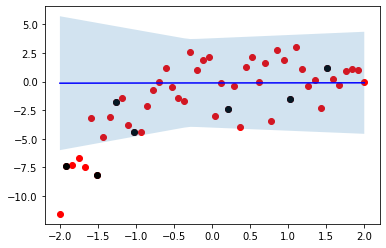

 28%|██▊       | 2798/10000 [00:56<01:52, 64.16it/s]

Mean training loss at epoch 2800 :                         2.886
Mean Validation loss after 2800 equals                     2.745

Validation loss for the function plotted:                 2.745


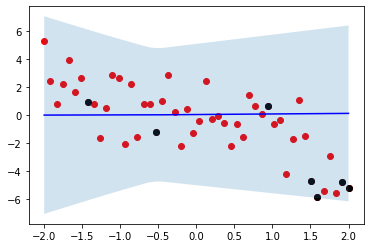

 29%|██▉       | 2900/10000 [00:58<01:53, 62.69it/s]

Mean training loss at epoch 2900 :                         2.771
Mean Validation loss after 2900 equals                     3.28

Validation loss for the function plotted:                 3.28


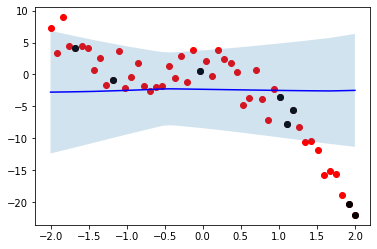

 30%|██▉       | 2996/10000 [01:00<01:48, 64.51it/s]

Mean training loss at epoch 3000 :                         3.054
Mean Validation loss after 3000 equals                     3.34

Validation loss for the function plotted:                 3.34


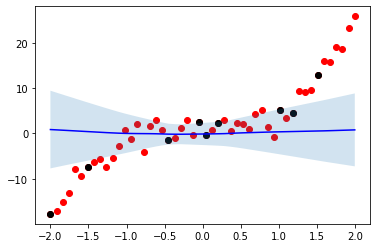

 31%|███       | 3096/10000 [01:02<02:00, 57.34it/s]

Mean training loss at epoch 3100 :                         2.896
Mean Validation loss after 3100 equals                     2.415

Validation loss for the function plotted:                 2.415


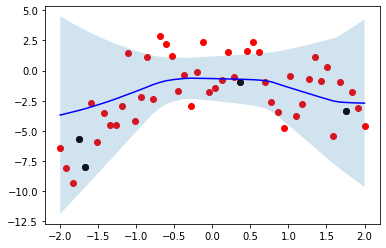

 32%|███▏      | 3194/10000 [01:04<01:53, 59.76it/s]

Mean training loss at epoch 3200 :                         2.637
Mean Validation loss after 3200 equals                     2.675

Validation loss for the function plotted:                 2.675


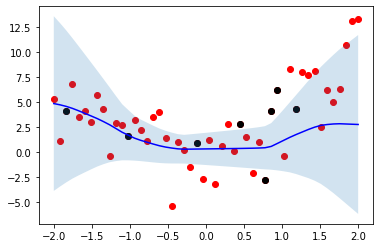

 33%|███▎      | 3297/10000 [01:05<01:44, 64.26it/s]

Mean training loss at epoch 3300 :                         2.689
Mean Validation loss after 3300 equals                     2.903

Validation loss for the function plotted:                 2.903


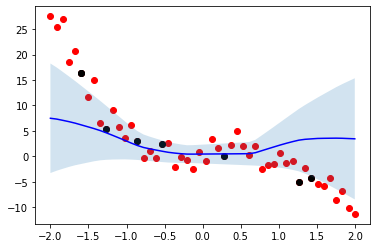

 34%|███▍      | 3398/10000 [01:07<01:47, 61.43it/s]

Mean training loss at epoch 3400 :                         2.874
Mean Validation loss after 3400 equals                     2.559

Validation loss for the function plotted:                 2.559


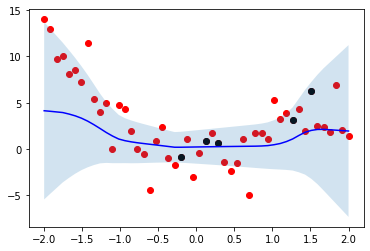

 35%|███▍      | 3495/10000 [01:09<01:49, 59.37it/s]

Mean training loss at epoch 3500 :                         2.759
Mean Validation loss after 3500 equals                     2.881

Validation loss for the function plotted:                 2.881


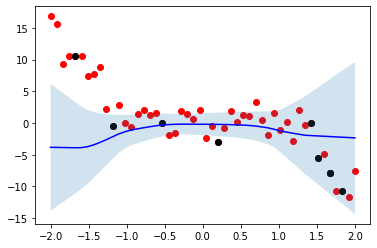

 36%|███▌      | 3600/10000 [01:11<01:38, 65.02it/s]

Mean training loss at epoch 3600 :                         2.714
Mean Validation loss after 3600 equals                     2.99

Validation loss for the function plotted:                 2.99


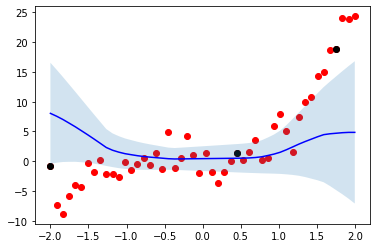

 37%|███▋      | 3700/10000 [01:13<01:52, 56.24it/s]

Mean training loss at epoch 3700 :                         2.569
Mean Validation loss after 3700 equals                     2.632

Validation loss for the function plotted:                 2.632


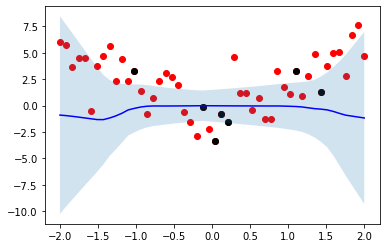

 38%|███▊      | 3796/10000 [01:15<01:39, 62.56it/s]

Mean training loss at epoch 3800 :                         2.243
Mean Validation loss after 3800 equals                     2.448

Validation loss for the function plotted:                 2.448


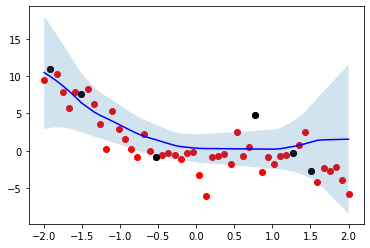

 39%|███▉      | 3900/10000 [01:17<01:35, 63.87it/s]

Mean training loss at epoch 3900 :                         2.652
Mean Validation loss after 3900 equals                     2.694

Validation loss for the function plotted:                 2.694


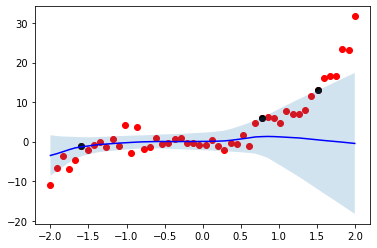

 40%|███▉      | 3995/10000 [01:18<01:32, 64.60it/s]

Mean training loss at epoch 4000 :                         2.34
Mean Validation loss after 4000 equals                     2.494

Validation loss for the function plotted:                 2.494


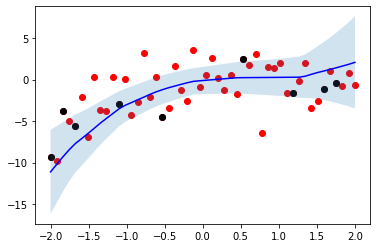

 41%|████      | 4098/10000 [01:20<01:29, 65.79it/s]

Mean training loss at epoch 4100 :                         2.39
Mean Validation loss after 4100 equals                     2.474

Validation loss for the function plotted:                 2.474


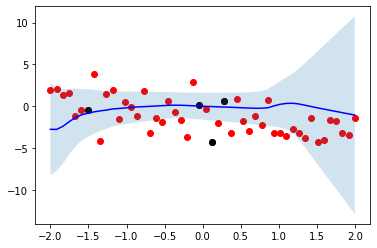

 42%|████▏     | 4196/10000 [01:22<01:32, 62.80it/s]

Mean training loss at epoch 4200 :                         2.189
Mean Validation loss after 4200 equals                     2.376

Validation loss for the function plotted:                 2.376


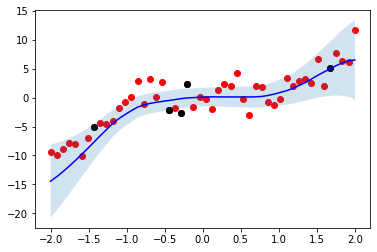

 43%|████▎     | 4295/10000 [01:24<01:24, 67.61it/s]

Mean training loss at epoch 4300 :                         2.353
Mean Validation loss after 4300 equals                     2.401

Validation loss for the function plotted:                 2.401


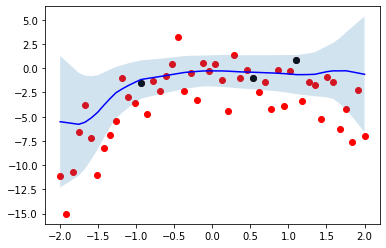

 44%|████▍     | 4394/10000 [01:25<01:25, 65.39it/s]

Mean training loss at epoch 4400 :                         2.466
Mean Validation loss after 4400 equals                     2.697

Validation loss for the function plotted:                 2.697


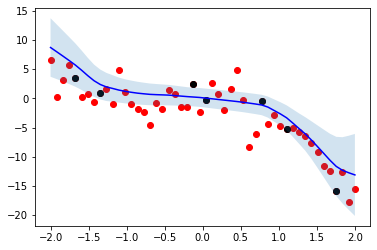

 45%|████▌     | 4500/10000 [01:27<01:23, 65.81it/s]

Mean training loss at epoch 4500 :                         2.346
Mean Validation loss after 4500 equals                     2.292

Validation loss for the function plotted:                 2.292


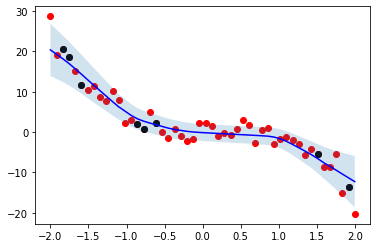

 46%|████▌     | 4598/10000 [01:29<01:24, 64.11it/s]

Mean training loss at epoch 4600 :                         2.232
Mean Validation loss after 4600 equals                     2.556

Validation loss for the function plotted:                 2.556


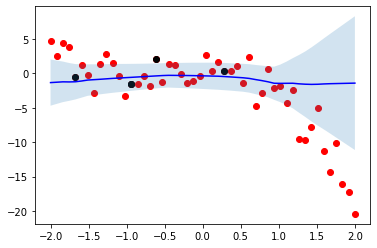

 47%|████▋     | 4696/10000 [01:30<01:21, 65.17it/s]

Mean training loss at epoch 4700 :                         2.381
Mean Validation loss after 4700 equals                     2.147

Validation loss for the function plotted:                 2.147


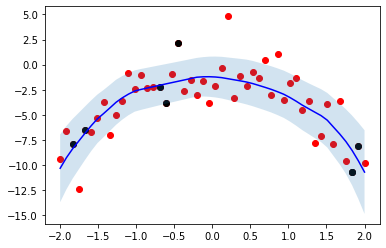

 48%|████▊     | 4793/10000 [01:32<01:19, 65.75it/s]

Mean training loss at epoch 4800 :                         2.655
Mean Validation loss after 4800 equals                     2.259

Validation loss for the function plotted:                 2.259


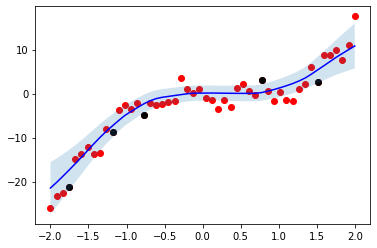

 49%|████▉     | 4900/10000 [01:34<01:18, 65.27it/s]

Mean training loss at epoch 4900 :                         2.296
Mean Validation loss after 4900 equals                     2.1

Validation loss for the function plotted:                 2.1


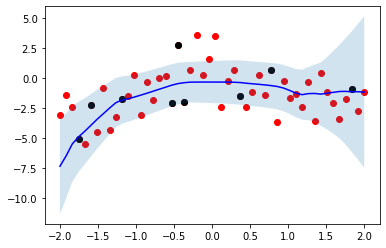

 50%|████▉     | 4998/10000 [01:36<02:08, 39.00it/s]

Mean training loss at epoch 5000 :                         2.28
Mean Validation loss after 5000 equals                     2.708

Validation loss for the function plotted:                 2.708


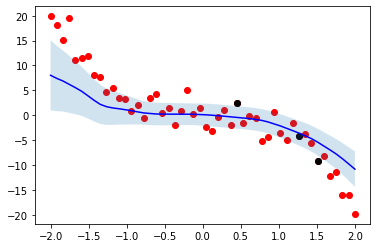

 51%|█████     | 5094/10000 [01:38<01:18, 62.57it/s]

Mean training loss at epoch 5100 :                         2.191
Mean Validation loss after 5100 equals                     2.345

Validation loss for the function plotted:                 2.345


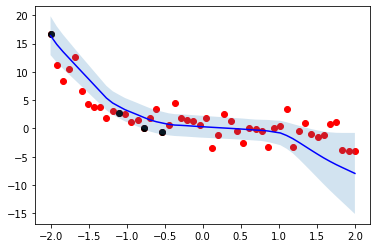

 52%|█████▏    | 5196/10000 [01:40<02:19, 34.56it/s]

Mean training loss at epoch 5200 :                         2.256
Mean Validation loss after 5200 equals                     2.302

Validation loss for the function plotted:                 2.302


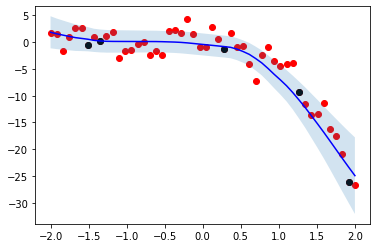

 53%|█████▎    | 5297/10000 [01:43<02:02, 38.51it/s]

Mean training loss at epoch 5300 :                         2.336
Mean Validation loss after 5300 equals                     2.323

Validation loss for the function plotted:                 2.323


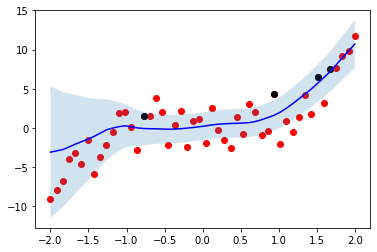

 54%|█████▍    | 5397/10000 [01:45<01:27, 52.31it/s]

Mean training loss at epoch 5400 :                         2.264
Mean Validation loss after 5400 equals                     3.347

Validation loss for the function plotted:                 3.347


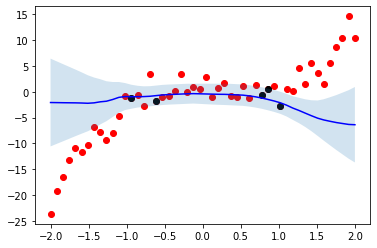

 55%|█████▍    | 5495/10000 [01:47<01:25, 52.63it/s]

Mean training loss at epoch 5500 :                         2.194
Mean Validation loss after 5500 equals                     2.276

Validation loss for the function plotted:                 2.276


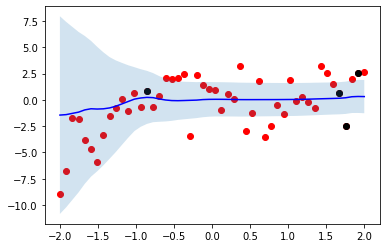

 56%|█████▌    | 5597/10000 [01:49<01:14, 58.91it/s]

Mean training loss at epoch 5600 :                         2.318
Mean Validation loss after 5600 equals                     2.35

Validation loss for the function plotted:                 2.35


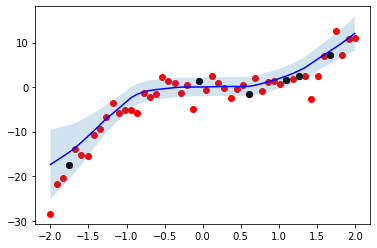

 57%|█████▋    | 5698/10000 [01:51<01:06, 65.02it/s]

Mean training loss at epoch 5700 :                         2.222
Mean Validation loss after 5700 equals                     2.346

Validation loss for the function plotted:                 2.346


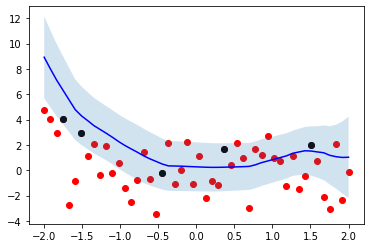

 58%|█████▊    | 5800/10000 [01:53<01:19, 53.01it/s]

Mean training loss at epoch 5800 :                         2.273
Mean Validation loss after 5800 equals                     2.716

Validation loss for the function plotted:                 2.716


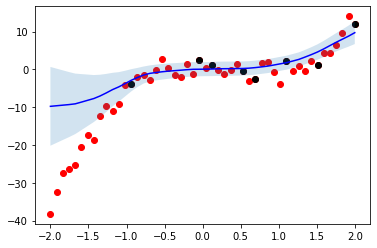

 59%|█████▉    | 5898/10000 [01:55<01:08, 59.92it/s]

Mean training loss at epoch 5900 :                         2.19
Mean Validation loss after 5900 equals                     2.296

Validation loss for the function plotted:                 2.296


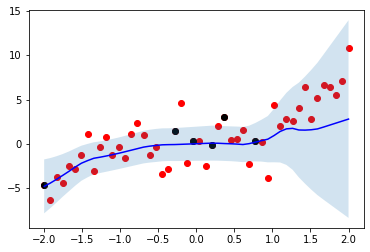

 60%|█████▉    | 5996/10000 [01:57<01:10, 56.94it/s]

Mean training loss at epoch 6000 :                         2.371
Mean Validation loss after 6000 equals                     2.564

Validation loss for the function plotted:                 2.564


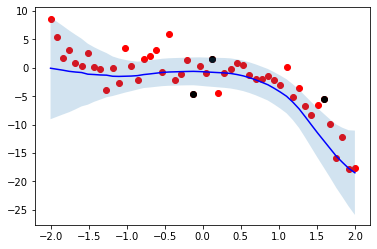

 61%|██████    | 6100/10000 [01:59<01:02, 62.32it/s]

Mean training loss at epoch 6100 :                         2.311
Mean Validation loss after 6100 equals                     2.62

Validation loss for the function plotted:                 2.62


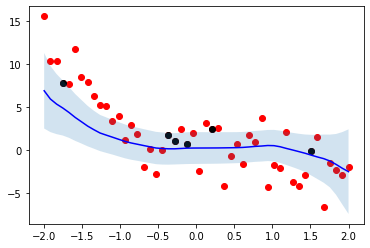

 62%|██████▏   | 6194/10000 [02:01<01:06, 57.45it/s]

Mean training loss at epoch 6200 :                         2.066
Mean Validation loss after 6200 equals                     2.118

Validation loss for the function plotted:                 2.118


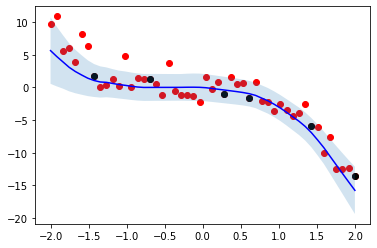

 63%|██████▎   | 6295/10000 [02:02<01:03, 58.49it/s]

Mean training loss at epoch 6300 :                         2.251
Mean Validation loss after 6300 equals                     3.214

Validation loss for the function plotted:                 3.214


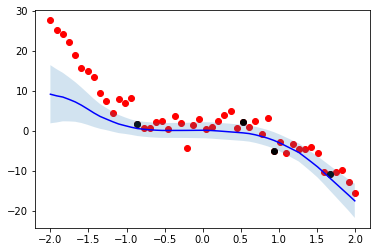

 64%|██████▍   | 6397/10000 [02:04<00:59, 60.92it/s]

Mean training loss at epoch 6400 :                         2.126
Mean Validation loss after 6400 equals                     2.339

Validation loss for the function plotted:                 2.339


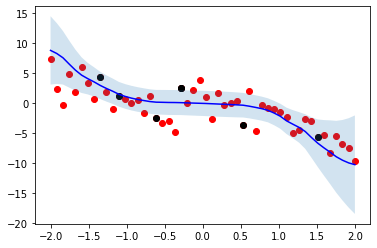

 65%|██████▌   | 6500/10000 [02:06<01:04, 54.25it/s]

Mean training loss at epoch 6500 :                         2.301
Mean Validation loss after 6500 equals                     2.389

Validation loss for the function plotted:                 2.389


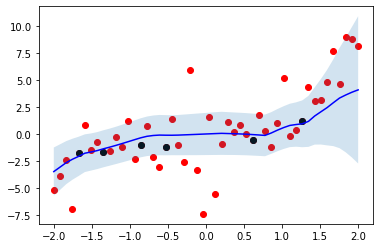

 66%|██████▌   | 6594/10000 [02:08<00:54, 62.50it/s]

Mean training loss at epoch 6600 :                         2.091
Mean Validation loss after 6600 equals                     2.27

Validation loss for the function plotted:                 2.27


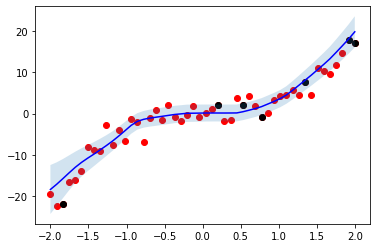

 67%|██████▋   | 6697/10000 [02:10<00:53, 61.86it/s]

Mean training loss at epoch 6700 :                         2.133
Mean Validation loss after 6700 equals                     3.061

Validation loss for the function plotted:                 3.061


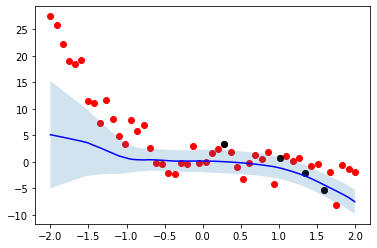

 68%|██████▊   | 6794/10000 [02:11<00:52, 61.29it/s]

Mean training loss at epoch 6800 :                         2.142
Mean Validation loss after 6800 equals                     2.318

Validation loss for the function plotted:                 2.318


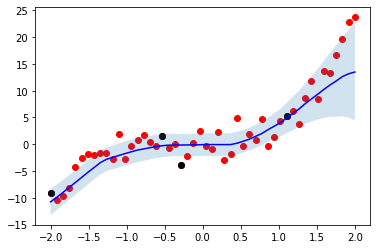

 69%|██████▉   | 6896/10000 [02:13<00:48, 63.96it/s]

Mean training loss at epoch 6900 :                         2.217
Mean Validation loss after 6900 equals                     2.651

Validation loss for the function plotted:                 2.651


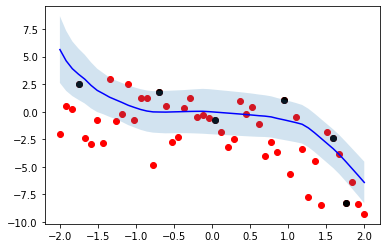

 70%|██████▉   | 6994/10000 [02:15<00:46, 64.51it/s]

Mean training loss at epoch 7000 :                         2.154
Mean Validation loss after 7000 equals                     2.178

Validation loss for the function plotted:                 2.178


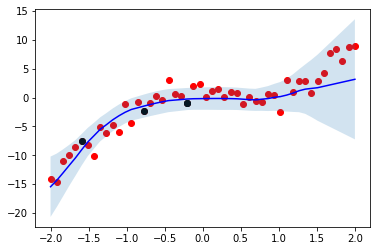

 71%|███████   | 7094/10000 [02:17<00:44, 66.04it/s]

Mean training loss at epoch 7100 :                         2.133
Mean Validation loss after 7100 equals                     2.476

Validation loss for the function plotted:                 2.476


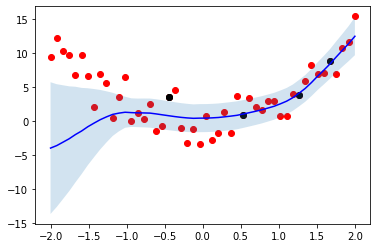

 72%|███████▏  | 7200/10000 [02:19<00:42, 66.63it/s]

Mean training loss at epoch 7200 :                         2.421
Mean Validation loss after 7200 equals                     2.263

Validation loss for the function plotted:                 2.263


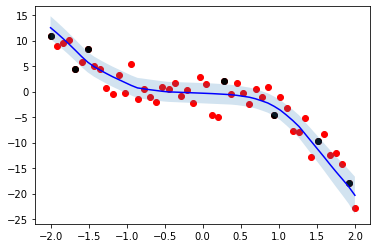

 73%|███████▎  | 7297/10000 [02:23<01:37, 27.83it/s]

Mean training loss at epoch 7300 :                         2.113
Mean Validation loss after 7300 equals                     2.366

Validation loss for the function plotted:                 2.366


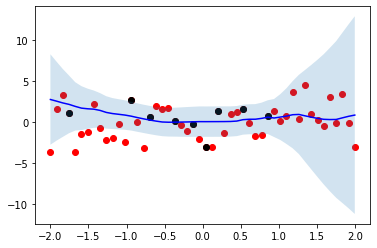

 74%|███████▍  | 7398/10000 [02:26<01:54, 22.63it/s]

Mean training loss at epoch 7400 :                         2.208
Mean Validation loss after 7400 equals                     2.439

Validation loss for the function plotted:                 2.439


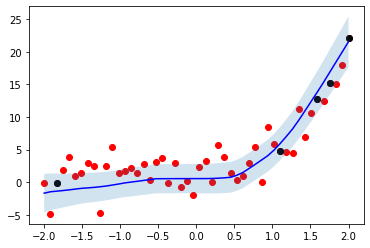

 75%|███████▌  | 7500/10000 [02:29<01:04, 38.67it/s]

Mean training loss at epoch 7500 :                         2.225
Mean Validation loss after 7500 equals                     2.322

Validation loss for the function plotted:                 2.322


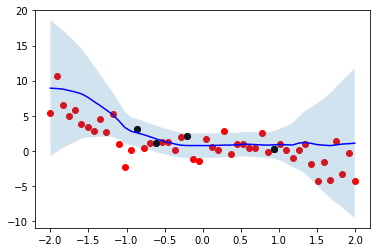

 76%|███████▌  | 7595/10000 [02:31<00:45, 53.10it/s]

Mean training loss at epoch 7600 :                         2.186
Mean Validation loss after 7600 equals                     2.789

Validation loss for the function plotted:                 2.789


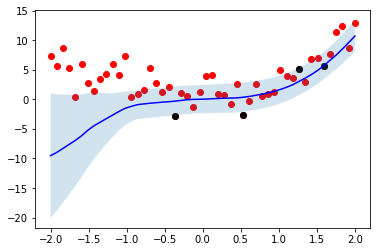

 77%|███████▋  | 7698/10000 [02:33<00:41, 54.83it/s]

Mean training loss at epoch 7700 :                         2.297
Mean Validation loss after 7700 equals                     2.302

Validation loss for the function plotted:                 2.302


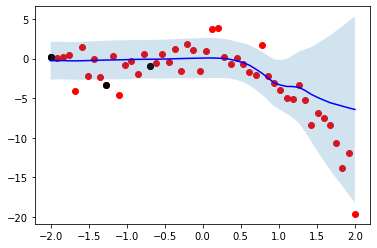

 78%|███████▊  | 7800/10000 [02:35<00:35, 62.79it/s]

Mean training loss at epoch 7800 :                         2.232
Mean Validation loss after 7800 equals                     2.339

Validation loss for the function plotted:                 2.339


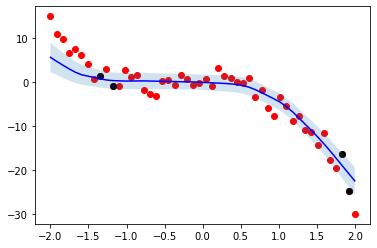

 79%|███████▉  | 7899/10000 [02:37<00:34, 61.38it/s]

Mean training loss at epoch 7900 :                         2.034
Mean Validation loss after 7900 equals                     2.893

Validation loss for the function plotted:                 2.893


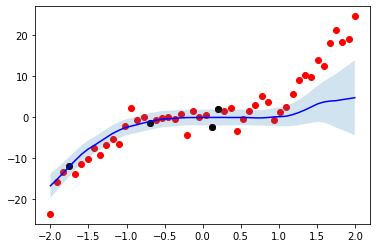

 80%|███████▉  | 7996/10000 [02:39<00:31, 63.47it/s]

Mean training loss at epoch 8000 :                         2.152
Mean Validation loss after 8000 equals                     2.745

Validation loss for the function plotted:                 2.745


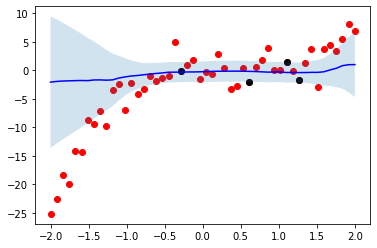

 81%|████████  | 8096/10000 [02:40<00:29, 65.20it/s]

Mean training loss at epoch 8100 :                         2.135
Mean Validation loss after 8100 equals                     2.469

Validation loss for the function plotted:                 2.469


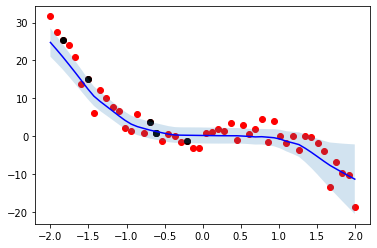

 82%|████████▏ | 8195/10000 [02:42<00:27, 65.58it/s]

Mean training loss at epoch 8200 :                         2.359
Mean Validation loss after 8200 equals                     2.456

Validation loss for the function plotted:                 2.456


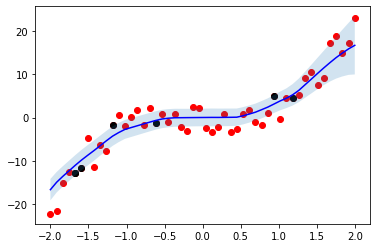

 83%|████████▎ | 8300/10000 [02:44<00:26, 64.68it/s]

Mean training loss at epoch 8300 :                         2.214
Mean Validation loss after 8300 equals                     2.375

Validation loss for the function plotted:                 2.375


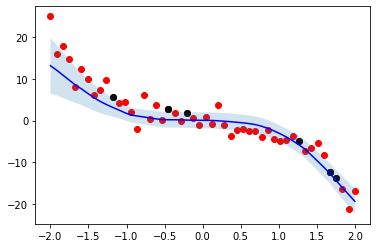

 84%|████████▍ | 8398/10000 [02:46<00:25, 63.77it/s]

Mean training loss at epoch 8400 :                         2.249
Mean Validation loss after 8400 equals                     2.307

Validation loss for the function plotted:                 2.307


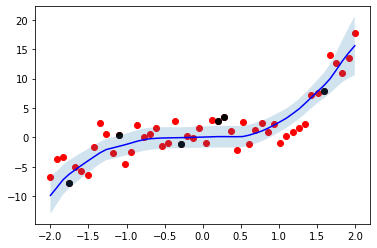

 85%|████████▍ | 8497/10000 [02:47<00:22, 66.29it/s]

Mean training loss at epoch 8500 :                         2.463
Mean Validation loss after 8500 equals                     2.382

Validation loss for the function plotted:                 2.382


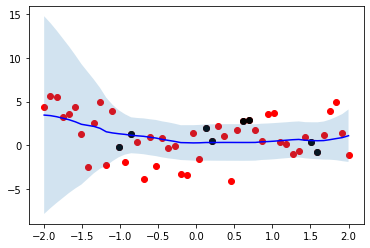

 86%|████████▌ | 8594/10000 [02:49<00:22, 63.83it/s]

Mean training loss at epoch 8600 :                         2.1
Mean Validation loss after 8600 equals                     2.215

Validation loss for the function plotted:                 2.215


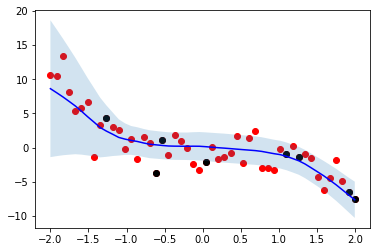

 87%|████████▋ | 8699/10000 [02:51<00:19, 66.02it/s]

Mean training loss at epoch 8700 :                         2.258
Mean Validation loss after 8700 equals                     2.273

Validation loss for the function plotted:                 2.273


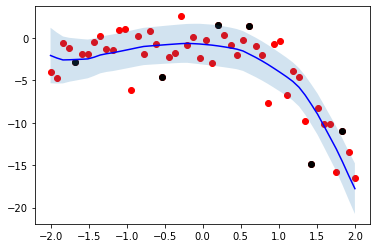

 88%|████████▊ | 8797/10000 [02:53<00:18, 66.60it/s]

Mean training loss at epoch 8800 :                         2.241
Mean Validation loss after 8800 equals                     2.374

Validation loss for the function plotted:                 2.374


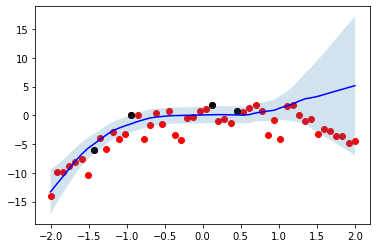

 89%|████████▉ | 8897/10000 [02:54<00:17, 63.00it/s]

Mean training loss at epoch 8900 :                         2.169
Mean Validation loss after 8900 equals                     2.521

Validation loss for the function plotted:                 2.521


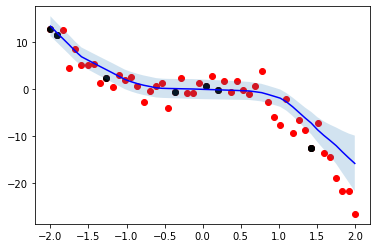

 90%|████████▉ | 8996/10000 [02:56<00:15, 66.12it/s]

Mean training loss at epoch 9000 :                         2.426
Mean Validation loss after 9000 equals                     2.407

Validation loss for the function plotted:                 2.407


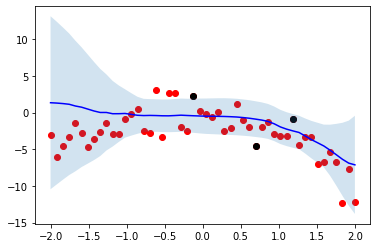

 91%|█████████ | 9095/10000 [02:58<00:13, 66.50it/s]

Mean training loss at epoch 9100 :                         2.148
Mean Validation loss after 9100 equals                     2.236

Validation loss for the function plotted:                 2.236


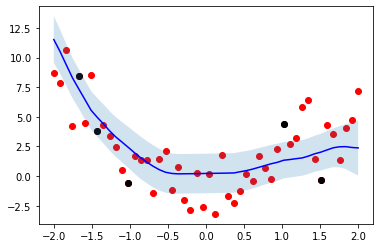

 92%|█████████▏| 9199/10000 [02:59<00:12, 64.97it/s]

Mean training loss at epoch 9200 :                         2.291
Mean Validation loss after 9200 equals                     2.518

Validation loss for the function plotted:                 2.518


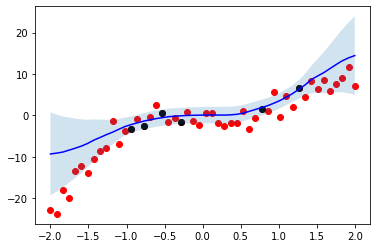

 93%|█████████▎| 9296/10000 [03:01<00:11, 61.46it/s]

Mean training loss at epoch 9300 :                         2.237
Mean Validation loss after 9300 equals                     2.753

Validation loss for the function plotted:                 2.753


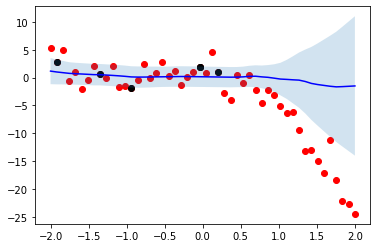

 94%|█████████▍| 9398/10000 [03:03<00:11, 50.58it/s]

Mean training loss at epoch 9400 :                         2.132
Mean Validation loss after 9400 equals                     2.202

Validation loss for the function plotted:                 2.202


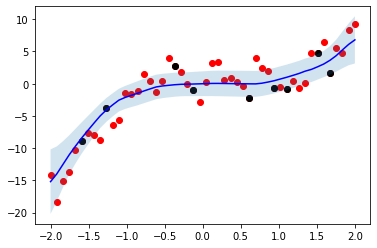

 95%|█████████▍| 9495/10000 [03:05<00:07, 63.70it/s]

Mean training loss at epoch 9500 :                         2.187
Mean Validation loss after 9500 equals                     2.435

Validation loss for the function plotted:                 2.435


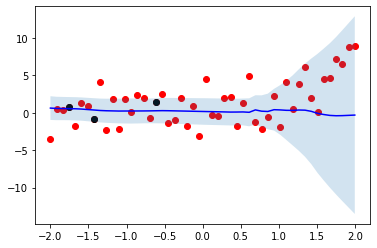

 96%|█████████▌| 9600/10000 [03:07<00:06, 63.75it/s]

Mean training loss at epoch 9600 :                         2.144
Mean Validation loss after 9600 equals                     2.37

Validation loss for the function plotted:                 2.37


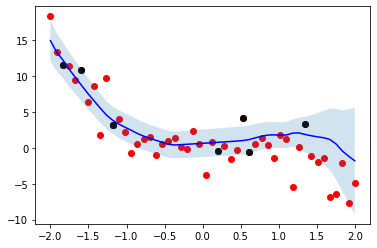

 97%|█████████▋| 9700/10000 [03:08<00:04, 65.54it/s]

Mean training loss at epoch 9700 :                         2.239
Mean Validation loss after 9700 equals                     2.369

Validation loss for the function plotted:                 2.369


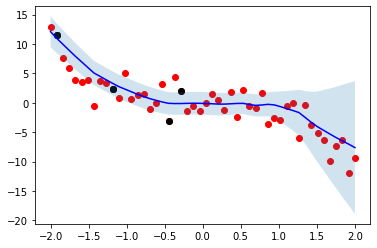

 98%|█████████▊| 9797/10000 [03:10<00:03, 63.59it/s]

Mean training loss at epoch 9800 :                         1.872
Mean Validation loss after 9800 equals                     2.439

Validation loss for the function plotted:                 2.439


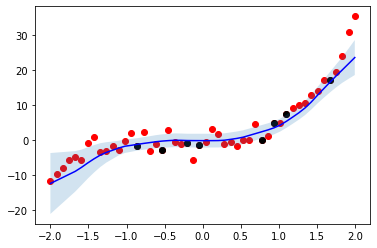

 99%|█████████▉| 9897/10000 [03:12<00:01, 67.63it/s]

Mean training loss at epoch 9900 :                         2.009
Mean Validation loss after 9900 equals                     2.341

Validation loss for the function plotted:                 2.341


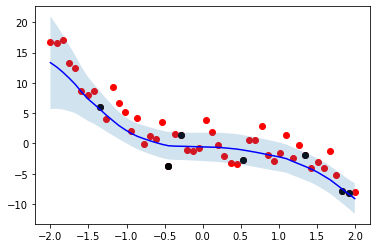

100%|██████████| 10000/10000 [03:13<00:00, 51.56it/s]


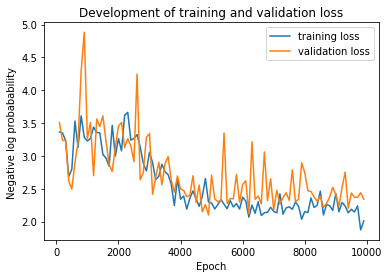

In [16]:
state_dict_encoder, state_dict_decoder, state_dict_aggregator, train_loss, vali_loss = trainer.run_training(
    batch_size_train=default_conf['train_kwargs']['batch_size_train'],
    batch_size_vali=default_conf['train_kwargs']['batch_size_vali'],
    print_after=default_conf['train_kwargs']['print_after'])

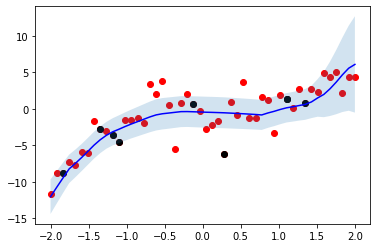

4.562657356262207


In [26]:
MSE = trainer.run_test(encoder_state_dict=state_dict_encoder,
              decoder_state_dict=state_dict_decoder,
              aggregator_state_dict=state_dict_aggregator,
              batch_size_test=default_conf['train_kwargs']['batch_size_test'])
print(MSE)

In [28]:
values = [state_dict_encoder, state_dict_decoder, state_dict_aggregator, train_loss, vali_loss]
names = ['encoder', 'decoder', 'aggregator', 'train_loss', 'vali_loss', 'mse']
to_save = [(name, value) for name, value in zip(names, values)]
directory = os.path.join(BASE_DIR,'experiments/results')


Helper.save_results(directory, '1d_polynomial_paper_setting_simple_mean', to_save)

## Simple aggregation using the sum as aggregation

In [32]:
default_conf['cnp_params']['aggregation_kwargs']['simple_aggregator_type'] = 'max'

  0%|          | 0/10000 [00:00<?, ?it/s]

No GPU available, training on CPU
Decoder(
  (_process_input): Sequential(
    (0): Linear(in_features=129, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=2, bias=True)
  )
)
Encoder(
  (_process_input): Sequential(
    (0): Linear(in_features=2, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=128, bias=True)
    (5): ReLU()
    (6): Linear(in_features=128, out_features=128, bias=True)
  )
)
Mean training loss at epoch 0 :                         42.139
Mean Validation loss after 0 equals                     76.222

Validation loss for the function plotted:                 76.222


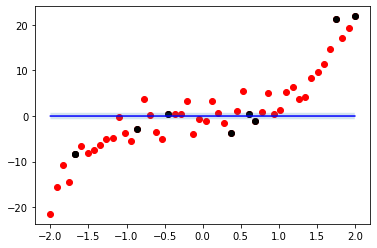

  1%|          | 96/10000 [00:01<03:05, 53.49it/s]

Mean training loss at epoch 100 :                         3.179
Mean Validation loss after 100 equals                     2.914

Validation loss for the function plotted:                 2.914


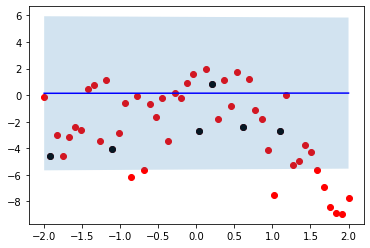

  2%|▏         | 200/10000 [00:03<02:25, 67.22it/s]

Mean training loss at epoch 200 :                         3.313
Mean Validation loss after 200 equals                     3.164

Validation loss for the function plotted:                 3.164


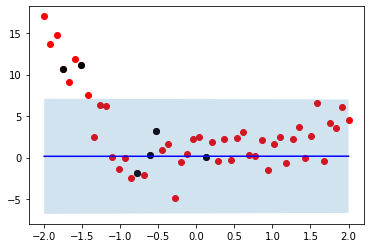

  3%|▎         | 295/10000 [00:05<02:31, 63.86it/s]

Mean training loss at epoch 300 :                         2.9
Mean Validation loss after 300 equals                     3.095

Validation loss for the function plotted:                 3.095


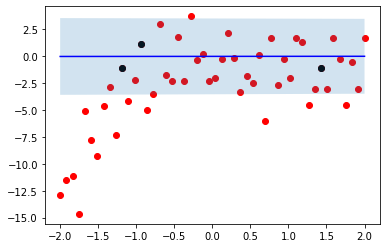

  4%|▍         | 397/10000 [00:07<02:40, 59.78it/s]

Mean training loss at epoch 400 :                         3.247
Mean Validation loss after 400 equals                     2.741

Validation loss for the function plotted:                 2.741


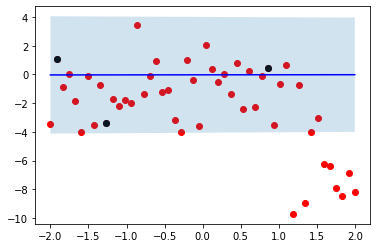

  5%|▍         | 495/10000 [00:09<02:42, 58.53it/s]

Mean training loss at epoch 500 :                         3.413
Mean Validation loss after 500 equals                     3.501

Validation loss for the function plotted:                 3.501


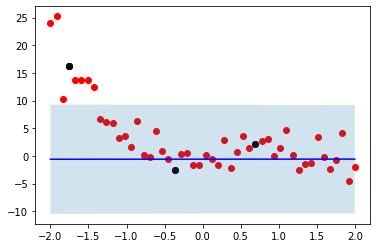

  6%|▌         | 595/10000 [00:11<02:19, 67.47it/s]

Mean training loss at epoch 600 :                         2.876
Mean Validation loss after 600 equals                     3.311

Validation loss for the function plotted:                 3.311


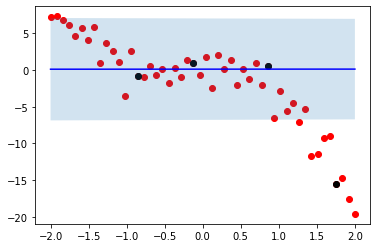

  7%|▋         | 699/10000 [00:12<02:13, 69.43it/s]

Mean training loss at epoch 700 :                         3.152
Mean Validation loss after 700 equals                     3.691

Validation loss for the function plotted:                 3.691


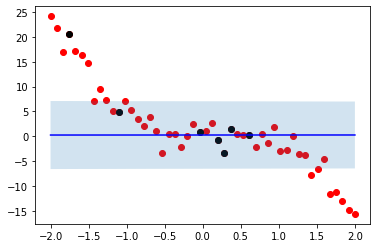

  8%|▊         | 793/10000 [00:14<02:16, 67.40it/s]

Mean training loss at epoch 800 :                         3.45
Mean Validation loss after 800 equals                     3.186

Validation loss for the function plotted:                 3.186


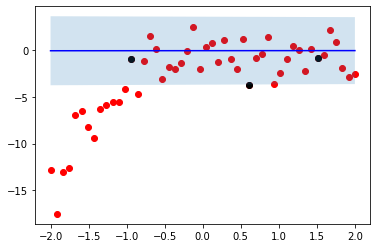

  9%|▉         | 896/10000 [00:15<02:13, 68.00it/s]

Mean training loss at epoch 900 :                         2.972
Mean Validation loss after 900 equals                     2.892

Validation loss for the function plotted:                 2.892


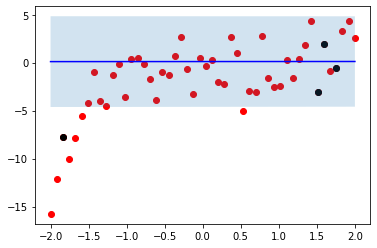

 10%|▉         | 998/10000 [00:17<02:08, 69.92it/s]

Mean training loss at epoch 1000 :                         3.274
Mean Validation loss after 1000 equals                     3.519

Validation loss for the function plotted:                 3.519


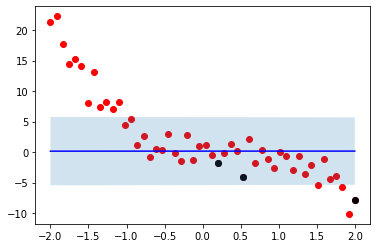

 11%|█         | 1096/10000 [00:19<02:09, 68.89it/s]

Mean training loss at epoch 1100 :                         2.894
Mean Validation loss after 1100 equals                     3.52

Validation loss for the function plotted:                 3.52


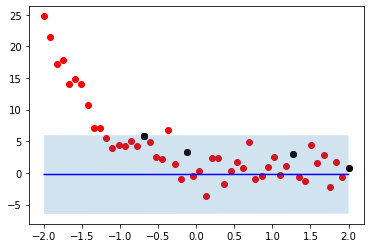

 12%|█▏        | 1197/10000 [00:20<02:14, 65.29it/s]

Mean training loss at epoch 1200 :                         3.46
Mean Validation loss after 1200 equals                     3.683

Validation loss for the function plotted:                 3.683


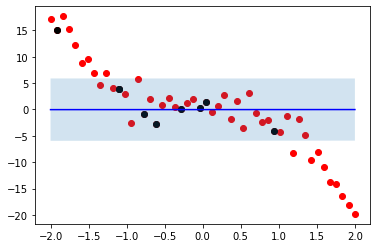

 13%|█▎        | 1299/10000 [00:22<02:06, 68.62it/s]

Mean training loss at epoch 1300 :                         2.827
Mean Validation loss after 1300 equals                     4.059

Validation loss for the function plotted:                 4.059


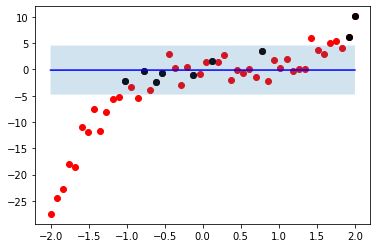

 14%|█▍        | 1398/10000 [00:24<02:09, 66.43it/s]

Mean training loss at epoch 1400 :                         3.552
Mean Validation loss after 1400 equals                     3.446

Validation loss for the function plotted:                 3.446


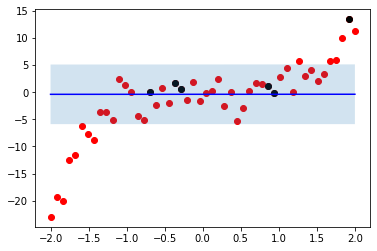

 15%|█▍        | 1498/10000 [00:25<02:04, 68.22it/s]

Mean training loss at epoch 1500 :                         3.197
Mean Validation loss after 1500 equals                     2.485

Validation loss for the function plotted:                 2.485


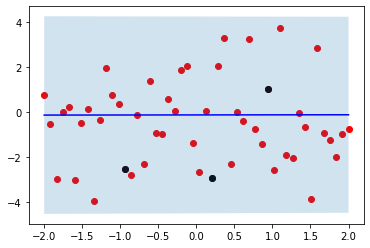

 16%|█▌        | 1595/10000 [00:27<02:05, 67.15it/s]

Mean training loss at epoch 1600 :                         3.125
Mean Validation loss after 1600 equals                     2.639

Validation loss for the function plotted:                 2.639


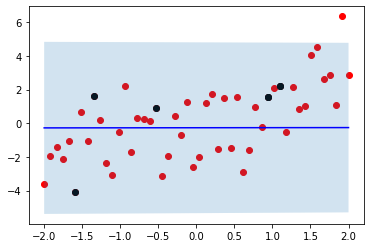

 17%|█▋        | 1699/10000 [00:29<02:04, 66.89it/s]

Mean training loss at epoch 1700 :                         2.79
Mean Validation loss after 1700 equals                     3.822

Validation loss for the function plotted:                 3.822


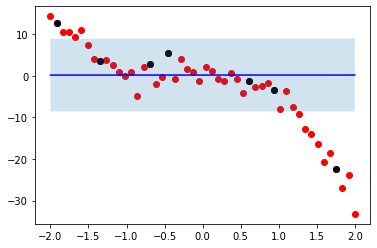

 18%|█▊        | 1800/10000 [00:30<02:00, 68.22it/s]

Mean training loss at epoch 1800 :                         3.411
Mean Validation loss after 1800 equals                     3.23

Validation loss for the function plotted:                 3.23


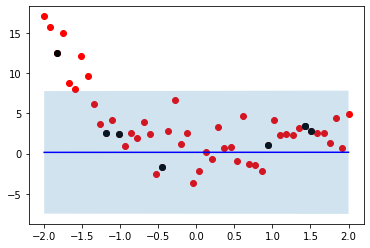

 19%|█▉        | 1895/10000 [00:32<01:58, 68.23it/s]

Mean training loss at epoch 1900 :                         3.239
Mean Validation loss after 1900 equals                     3.663

Validation loss for the function plotted:                 3.663


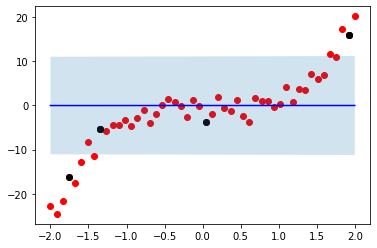

 20%|██        | 2000/10000 [00:34<02:04, 64.50it/s]

Mean training loss at epoch 2000 :                         3.316
Mean Validation loss after 2000 equals                     2.758

Validation loss for the function plotted:                 2.758


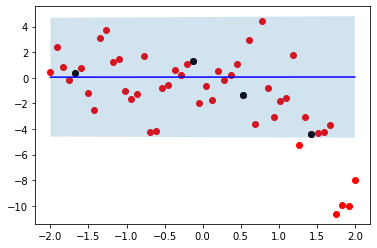

 21%|██        | 2099/10000 [00:35<01:51, 70.55it/s]

Mean training loss at epoch 2100 :                         3.189
Mean Validation loss after 2100 equals                     3.465

Validation loss for the function plotted:                 3.465


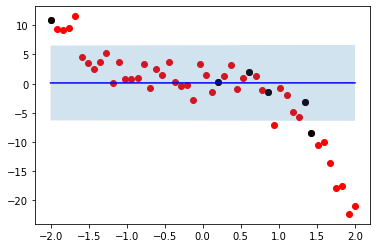

 22%|██▏       | 2197/10000 [00:37<01:51, 69.78it/s]

Mean training loss at epoch 2200 :                         3.269
Mean Validation loss after 2200 equals                     2.982

Validation loss for the function plotted:                 2.982


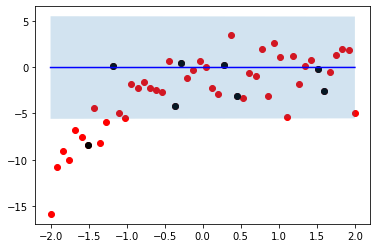

 23%|██▎       | 2300/10000 [00:39<01:56, 66.09it/s]

Mean training loss at epoch 2300 :                         3.134
Mean Validation loss after 2300 equals                     3.188

Validation loss for the function plotted:                 3.188


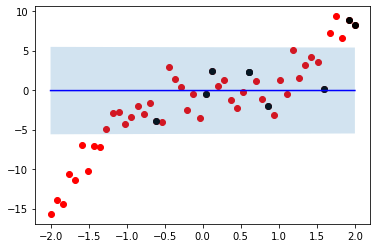

 24%|██▍       | 2395/10000 [00:40<01:50, 68.80it/s]

Mean training loss at epoch 2400 :                         3.279
Mean Validation loss after 2400 equals                     3.378

Validation loss for the function plotted:                 3.378


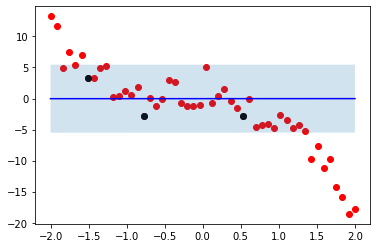

 25%|██▍       | 2497/10000 [00:42<01:49, 68.23it/s]

Mean training loss at epoch 2500 :                         3.034
Mean Validation loss after 2500 equals                     4.307

Validation loss for the function plotted:                 4.307


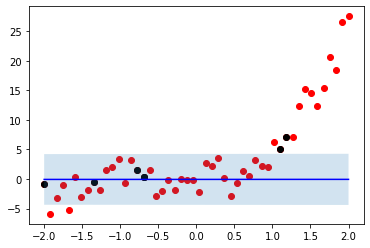

 26%|██▌       | 2598/10000 [00:43<01:50, 66.99it/s]

Mean training loss at epoch 2600 :                         3.405
Mean Validation loss after 2600 equals                     3.738

Validation loss for the function plotted:                 3.738


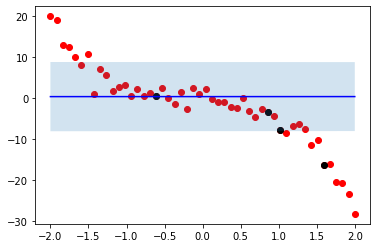

 27%|██▋       | 2698/10000 [00:45<01:48, 67.34it/s]

Mean training loss at epoch 2700 :                         3.649
Mean Validation loss after 2700 equals                     4.011

Validation loss for the function plotted:                 4.011


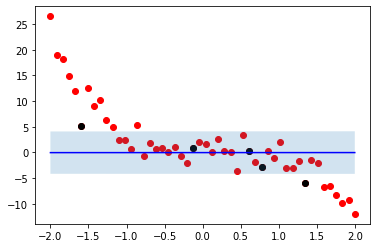

 28%|██▊       | 2800/10000 [00:47<01:45, 67.96it/s]

Mean training loss at epoch 2800 :                         3.295
Mean Validation loss after 2800 equals                     2.479

Validation loss for the function plotted:                 2.479


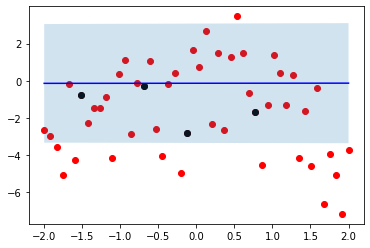

 29%|██▉       | 2894/10000 [00:48<01:46, 66.64it/s]

Mean training loss at epoch 2900 :                         2.832
Mean Validation loss after 2900 equals                     3.765

Validation loss for the function plotted:                 3.765


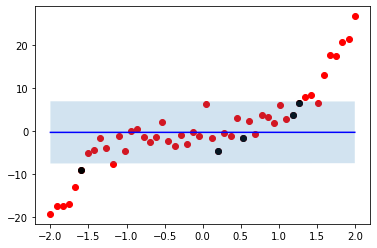

 30%|██▉       | 2995/10000 [00:50<01:43, 67.41it/s]

Mean training loss at epoch 3000 :                         3.188
Mean Validation loss after 3000 equals                     3.191

Validation loss for the function plotted:                 3.191


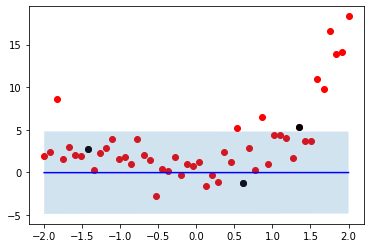

 31%|███       | 3095/10000 [00:52<01:45, 65.40it/s]

Mean training loss at epoch 3100 :                         3.258
Mean Validation loss after 3100 equals                     2.544

Validation loss for the function plotted:                 2.544


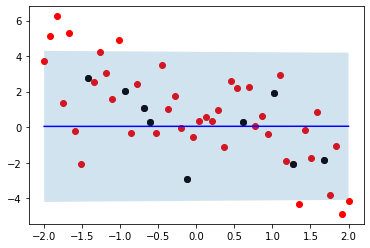

 32%|███▏      | 3194/10000 [00:53<01:41, 67.30it/s]

Mean training loss at epoch 3200 :                         2.887
Mean Validation loss after 3200 equals                     3.654

Validation loss for the function plotted:                 3.654


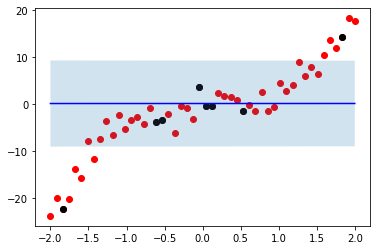

 33%|███▎      | 3295/10000 [00:55<01:38, 67.75it/s]

Mean training loss at epoch 3300 :                         3.296
Mean Validation loss after 3300 equals                     3.954

Validation loss for the function plotted:                 3.954


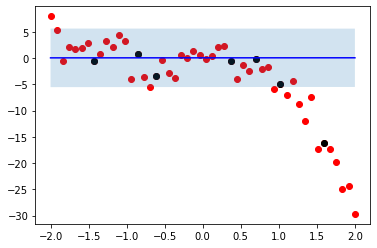

 34%|███▍      | 3394/10000 [00:57<01:38, 66.77it/s]

Mean training loss at epoch 3400 :                         3.126
Mean Validation loss after 3400 equals                     2.537

Validation loss for the function plotted:                 2.537


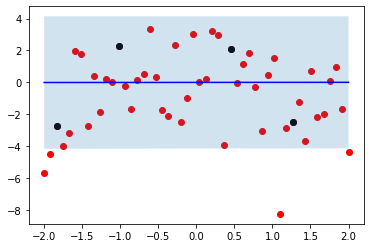

 35%|███▍      | 3499/10000 [00:58<01:37, 66.60it/s]

Mean training loss at epoch 3500 :                         2.922
Mean Validation loss after 3500 equals                     3.546

Validation loss for the function plotted:                 3.546


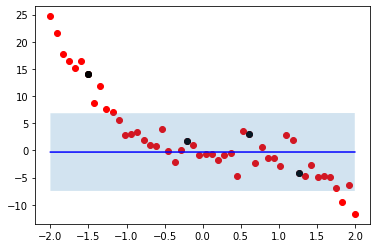

 36%|███▌      | 3600/10000 [01:00<01:34, 67.68it/s]

Mean training loss at epoch 3600 :                         3.078
Mean Validation loss after 3600 equals                     3.02

Validation loss for the function plotted:                 3.02


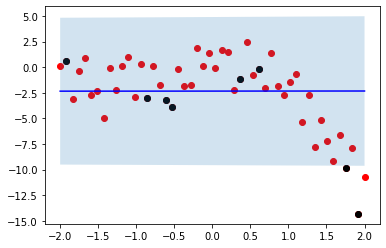

 37%|███▋      | 3694/10000 [01:02<01:34, 66.42it/s]

Mean training loss at epoch 3700 :                         3.298
Mean Validation loss after 3700 equals                     3.635

Validation loss for the function plotted:                 3.635


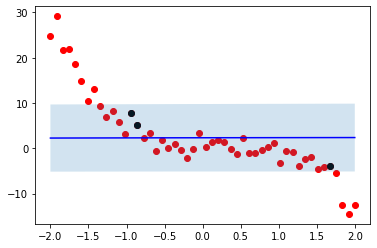

 38%|███▊      | 3796/10000 [01:03<01:32, 67.05it/s]

Mean training loss at epoch 3800 :                         2.806
Mean Validation loss after 3800 equals                     4.193

Validation loss for the function plotted:                 4.193


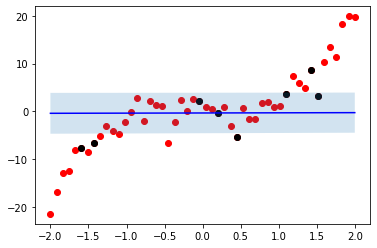

 39%|███▉      | 3898/10000 [01:05<01:29, 67.80it/s]

Mean training loss at epoch 3900 :                         3.412
Mean Validation loss after 3900 equals                     2.781

Validation loss for the function plotted:                 2.781


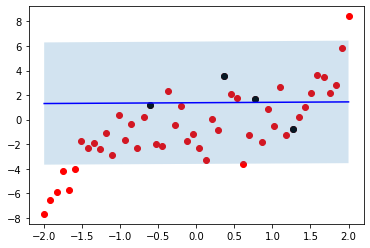

 40%|████      | 4000/10000 [01:07<01:28, 67.97it/s]

Mean training loss at epoch 4000 :                         2.876
Mean Validation loss after 4000 equals                     3.273

Validation loss for the function plotted:                 3.273


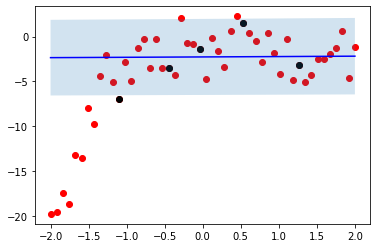

 41%|████      | 4095/10000 [01:08<01:25, 69.44it/s]

Mean training loss at epoch 4100 :                         3.516
Mean Validation loss after 4100 equals                     3.17

Validation loss for the function plotted:                 3.17


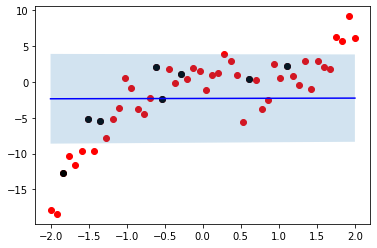

 42%|████▏     | 4194/10000 [01:10<01:27, 66.06it/s]

Mean training loss at epoch 4200 :                         3.697
Mean Validation loss after 4200 equals                     2.902

Validation loss for the function plotted:                 2.902


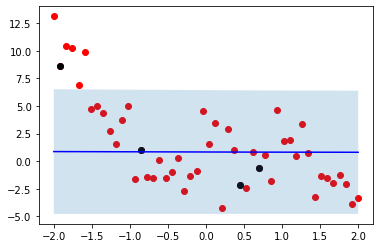

 43%|████▎     | 4293/10000 [01:12<01:27, 65.33it/s]

Mean training loss at epoch 4300 :                         3.57
Mean Validation loss after 4300 equals                     3.534

Validation loss for the function plotted:                 3.534


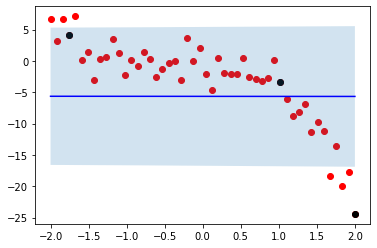

 44%|████▍     | 4396/10000 [01:13<01:23, 67.34it/s]

Mean training loss at epoch 4400 :                         2.862
Mean Validation loss after 4400 equals                     3.748

Validation loss for the function plotted:                 3.748


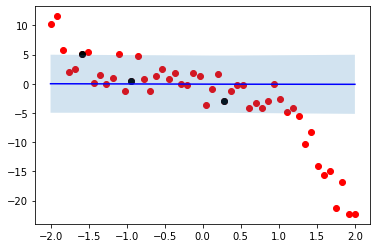

 45%|████▍     | 4498/10000 [01:15<01:20, 68.52it/s]

Mean training loss at epoch 4500 :                         3.241
Mean Validation loss after 4500 equals                     3.526

Validation loss for the function plotted:                 3.526


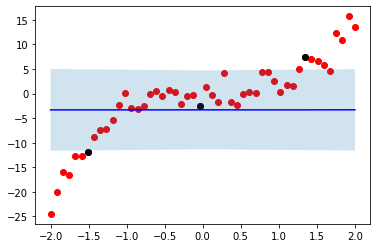

 46%|████▌     | 4599/10000 [01:17<01:20, 66.99it/s]

Mean training loss at epoch 4600 :                         3.092
Mean Validation loss after 4600 equals                     3.163

Validation loss for the function plotted:                 3.163


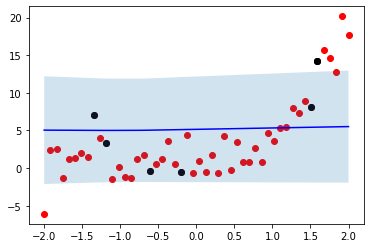

 47%|████▋     | 4700/10000 [01:18<01:18, 67.38it/s]

Mean training loss at epoch 4700 :                         2.959
Mean Validation loss after 4700 equals                     2.702

Validation loss for the function plotted:                 2.702


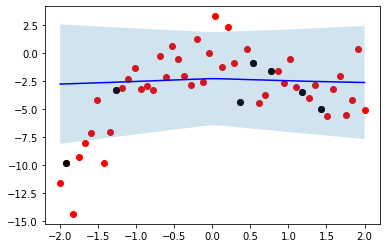

 48%|████▊     | 4795/10000 [01:20<01:17, 66.83it/s]

Mean training loss at epoch 4800 :                         3.077
Mean Validation loss after 4800 equals                     2.592

Validation loss for the function plotted:                 2.592


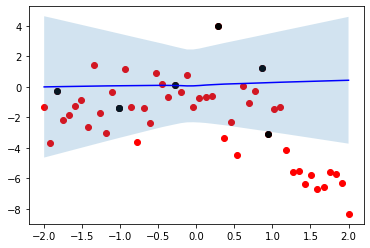

 49%|████▉     | 4894/10000 [01:22<01:18, 65.22it/s]

Mean training loss at epoch 4900 :                         3.154
Mean Validation loss after 4900 equals                     3.484

Validation loss for the function plotted:                 3.484


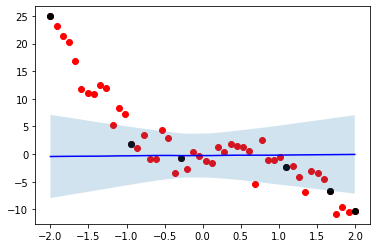

 50%|████▉     | 4996/10000 [01:23<01:13, 68.24it/s]

Mean training loss at epoch 5000 :                         2.95
Mean Validation loss after 5000 equals                     2.315

Validation loss for the function plotted:                 2.315


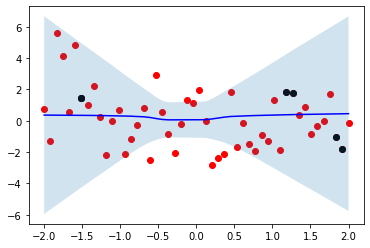

 51%|█████     | 5098/10000 [01:25<01:13, 66.67it/s]

Mean training loss at epoch 5100 :                         2.783
Mean Validation loss after 5100 equals                     2.81

Validation loss for the function plotted:                 2.81


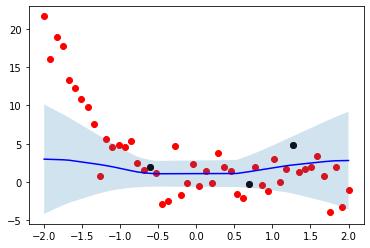

 52%|█████▏    | 5198/10000 [01:27<01:12, 65.81it/s]

Mean training loss at epoch 5200 :                         2.588
Mean Validation loss after 5200 equals                     3.169

Validation loss for the function plotted:                 3.169


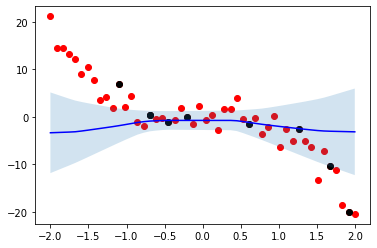

 53%|█████▎    | 5296/10000 [01:28<01:20, 58.09it/s]

Mean training loss at epoch 5300 :                         2.845
Mean Validation loss after 5300 equals                     2.354

Validation loss for the function plotted:                 2.354


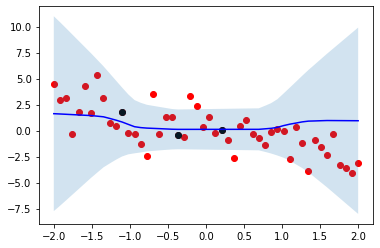

 54%|█████▍    | 5394/10000 [01:30<01:09, 66.17it/s]

Mean training loss at epoch 5400 :                         2.918
Mean Validation loss after 5400 equals                     3.168

Validation loss for the function plotted:                 3.168


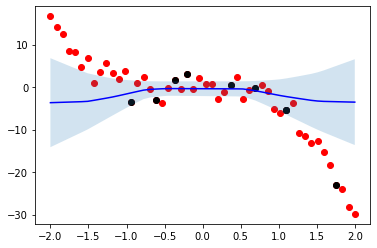

 55%|█████▍    | 5498/10000 [01:32<01:06, 67.63it/s]

Mean training loss at epoch 5500 :                         2.742
Mean Validation loss after 5500 equals                     2.34

Validation loss for the function plotted:                 2.34


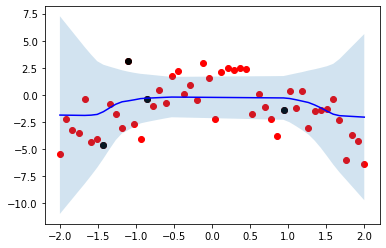

 56%|█████▌    | 5600/10000 [01:34<01:09, 63.18it/s]

Mean training loss at epoch 5600 :                         2.997
Mean Validation loss after 5600 equals                     3.261

Validation loss for the function plotted:                 3.261


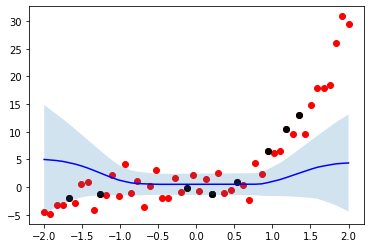

 57%|█████▋    | 5697/10000 [01:35<01:05, 65.70it/s]

Mean training loss at epoch 5700 :                         2.734
Mean Validation loss after 5700 equals                     2.889

Validation loss for the function plotted:                 2.889


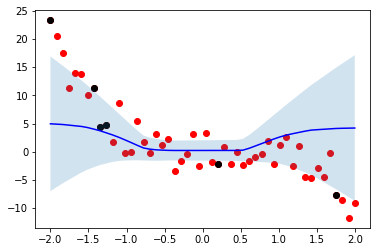

 58%|█████▊    | 5796/10000 [01:37<01:03, 66.68it/s]

Mean training loss at epoch 5800 :                         2.497
Mean Validation loss after 5800 equals                     2.891

Validation loss for the function plotted:                 2.891


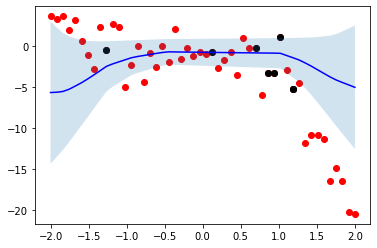

 59%|█████▉    | 5894/10000 [01:39<01:05, 62.86it/s]

Mean training loss at epoch 5900 :                         2.801
Mean Validation loss after 5900 equals                     2.843

Validation loss for the function plotted:                 2.843


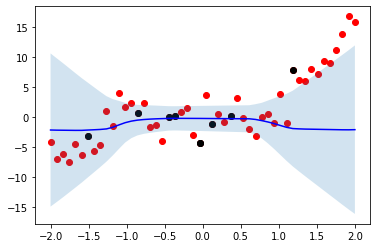

 60%|█████▉    | 5997/10000 [01:41<01:05, 61.25it/s]

Mean training loss at epoch 6000 :                         2.619
Mean Validation loss after 6000 equals                     2.707

Validation loss for the function plotted:                 2.707


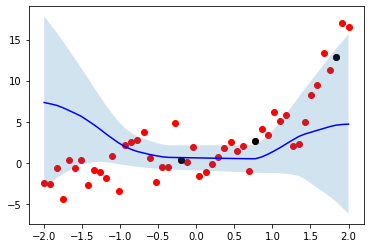

 61%|██████    | 6095/10000 [01:42<01:00, 64.35it/s]

Mean training loss at epoch 6100 :                         2.294
Mean Validation loss after 6100 equals                     2.609

Validation loss for the function plotted:                 2.609


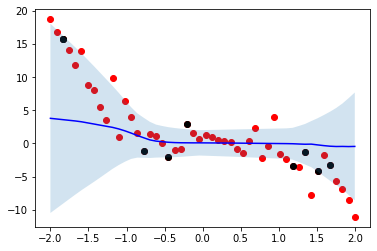

 62%|██████▏   | 6200/10000 [01:44<01:00, 62.82it/s]

Mean training loss at epoch 6200 :                         2.501
Mean Validation loss after 6200 equals                     2.535

Validation loss for the function plotted:                 2.535


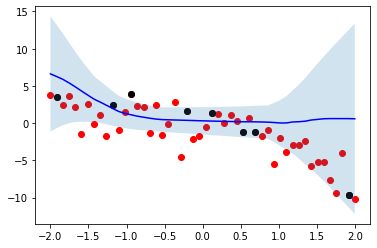

 63%|██████▎   | 6293/10000 [01:46<00:55, 66.96it/s]

Mean training loss at epoch 6300 :                         2.713
Mean Validation loss after 6300 equals                     2.574

Validation loss for the function plotted:                 2.574


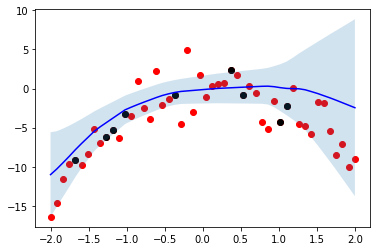

 64%|██████▍   | 6394/10000 [01:47<00:54, 65.98it/s]

Mean training loss at epoch 6400 :                         2.761
Mean Validation loss after 6400 equals                     2.554

Validation loss for the function plotted:                 2.554


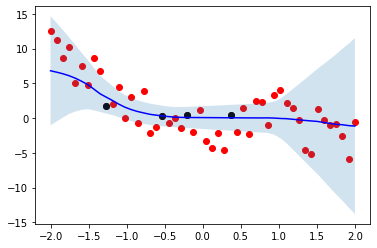

 65%|██████▍   | 6499/10000 [01:49<00:52, 66.35it/s]

Mean training loss at epoch 6500 :                         2.692
Mean Validation loss after 6500 equals                     2.379

Validation loss for the function plotted:                 2.379


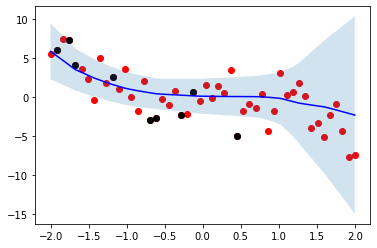

 66%|██████▌   | 6600/10000 [01:51<00:50, 67.70it/s]

Mean training loss at epoch 6600 :                         2.344
Mean Validation loss after 6600 equals                     2.398

Validation loss for the function plotted:                 2.398


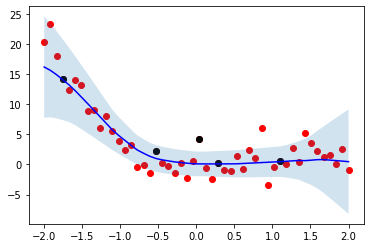

 67%|██████▋   | 6694/10000 [01:52<00:49, 66.36it/s]

Mean training loss at epoch 6700 :                         2.25
Mean Validation loss after 6700 equals                     2.476

Validation loss for the function plotted:                 2.476


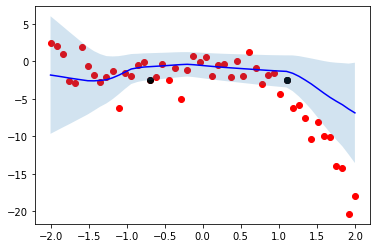

 68%|██████▊   | 6794/10000 [01:54<00:48, 65.91it/s]

Mean training loss at epoch 6800 :                         2.308
Mean Validation loss after 6800 equals                     2.269

Validation loss for the function plotted:                 2.269


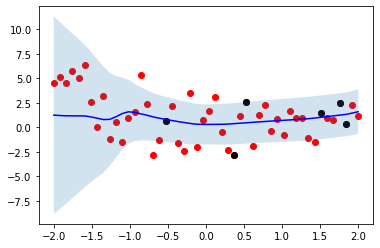

 69%|██████▉   | 6894/10000 [01:56<00:46, 66.57it/s]

Mean training loss at epoch 6900 :                         2.302
Mean Validation loss after 6900 equals                     2.639

Validation loss for the function plotted:                 2.639


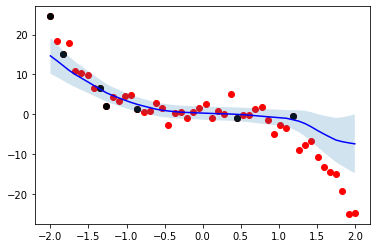

 70%|██████▉   | 6993/10000 [01:57<00:48, 62.45it/s]

Mean training loss at epoch 7000 :                         2.461
Mean Validation loss after 7000 equals                     2.341

Validation loss for the function plotted:                 2.341


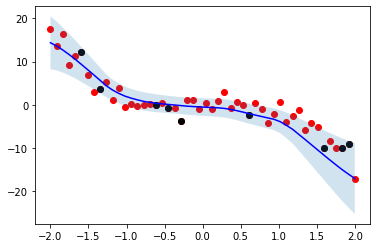

 71%|███████   | 7095/10000 [01:59<00:42, 68.35it/s]

Mean training loss at epoch 7100 :                         2.233
Mean Validation loss after 7100 equals                     2.918

Validation loss for the function plotted:                 2.918


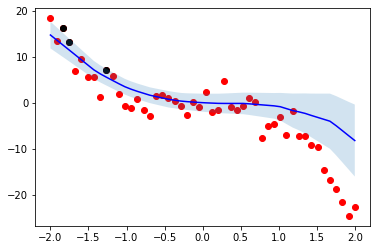

 72%|███████▏  | 7200/10000 [02:01<00:42, 66.15it/s]

Mean training loss at epoch 7200 :                         2.903
Mean Validation loss after 7200 equals                     2.441

Validation loss for the function plotted:                 2.441


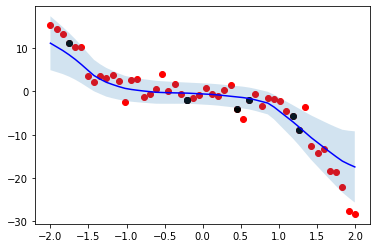

 73%|███████▎  | 7296/10000 [02:02<00:39, 68.63it/s]

Mean training loss at epoch 7300 :                         2.631
Mean Validation loss after 7300 equals                     2.319

Validation loss for the function plotted:                 2.319


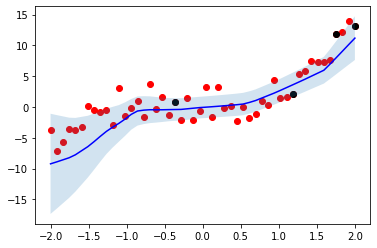

 74%|███████▍  | 7394/10000 [02:04<00:38, 67.43it/s]

Mean training loss at epoch 7400 :                         2.811
Mean Validation loss after 7400 equals                     2.68

Validation loss for the function plotted:                 2.68


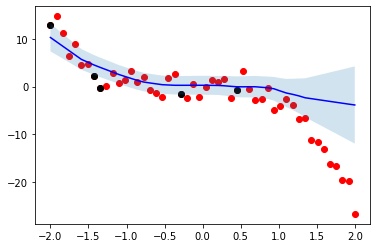

 75%|███████▍  | 7495/10000 [02:06<00:37, 67.55it/s]

Mean training loss at epoch 7500 :                         2.801
Mean Validation loss after 7500 equals                     2.429

Validation loss for the function plotted:                 2.429


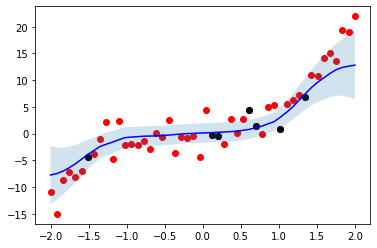

 76%|███████▌  | 7594/10000 [02:07<00:35, 67.56it/s]

Mean training loss at epoch 7600 :                         2.405
Mean Validation loss after 7600 equals                     2.6

Validation loss for the function plotted:                 2.6


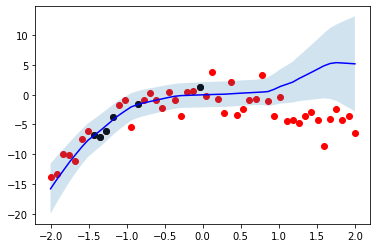

 77%|███████▋  | 7700/10000 [02:09<00:34, 67.19it/s]

Mean training loss at epoch 7700 :                         2.326
Mean Validation loss after 7700 equals                     2.585

Validation loss for the function plotted:                 2.585


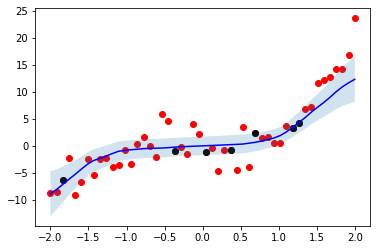

 78%|███████▊  | 7800/10000 [02:11<00:33, 66.47it/s]

Mean training loss at epoch 7800 :                         2.128
Mean Validation loss after 7800 equals                     2.368

Validation loss for the function plotted:                 2.368


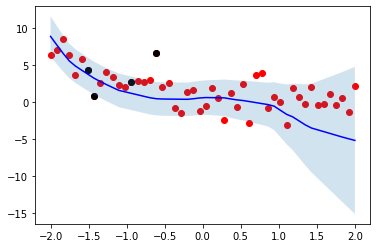

 79%|███████▉  | 7900/10000 [02:12<00:31, 66.18it/s]

Mean training loss at epoch 7900 :                         2.293
Mean Validation loss after 7900 equals                     2.276

Validation loss for the function plotted:                 2.276


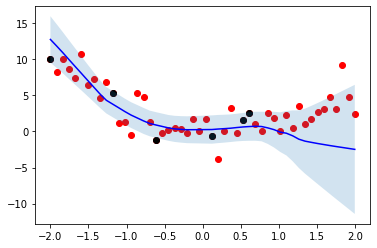

 80%|████████  | 8000/10000 [02:14<00:29, 67.70it/s]

Mean training loss at epoch 8000 :                         2.45
Mean Validation loss after 8000 equals                     2.276

Validation loss for the function plotted:                 2.276


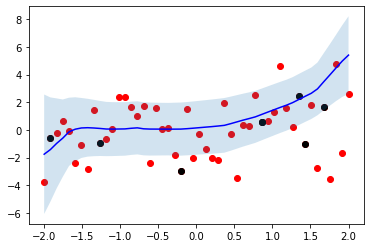

 81%|████████  | 8094/10000 [02:16<00:28, 67.99it/s]

Mean training loss at epoch 8100 :                         2.318
Mean Validation loss after 8100 equals                     2.702

Validation loss for the function plotted:                 2.702


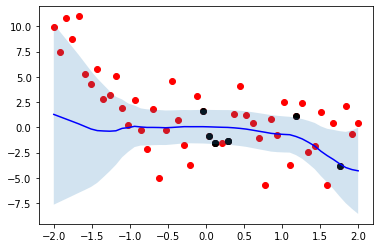

 82%|████████▏ | 8194/10000 [02:17<00:27, 66.76it/s]

Mean training loss at epoch 8200 :                         1.954
Mean Validation loss after 8200 equals                     2.315

Validation loss for the function plotted:                 2.315


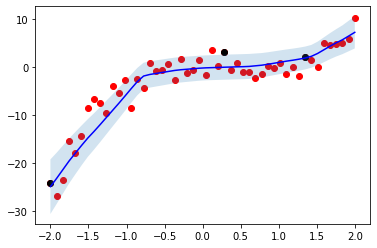

 83%|████████▎ | 8296/10000 [02:19<00:24, 69.82it/s]

Mean training loss at epoch 8300 :                         2.387
Mean Validation loss after 8300 equals                     1.992

Validation loss for the function plotted:                 1.992


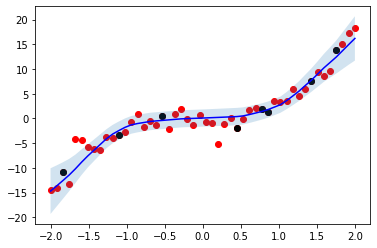

 84%|████████▍ | 8398/10000 [02:21<00:23, 67.03it/s]

Mean training loss at epoch 8400 :                         2.251
Mean Validation loss after 8400 equals                     1.964

Validation loss for the function plotted:                 1.964


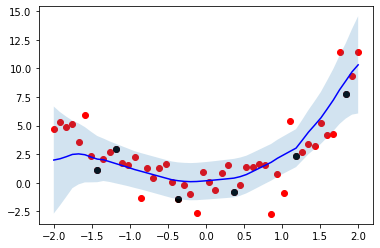

 85%|████████▍ | 8499/10000 [02:22<00:22, 65.74it/s]

Mean training loss at epoch 8500 :                         2.401
Mean Validation loss after 8500 equals                     2.399

Validation loss for the function plotted:                 2.399


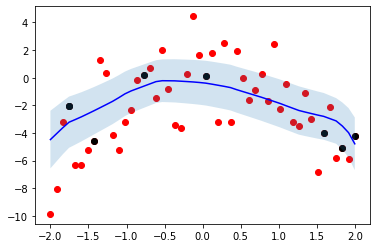

 86%|████████▌ | 8597/10000 [02:24<00:21, 66.05it/s]

Mean training loss at epoch 8600 :                         2.308
Mean Validation loss after 8600 equals                     2.358

Validation loss for the function plotted:                 2.358


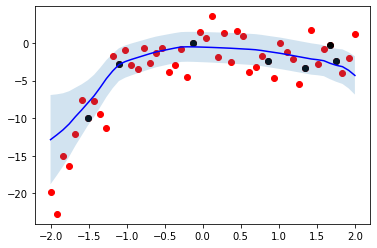

 87%|████████▋ | 8695/10000 [02:26<00:19, 66.12it/s]

Mean training loss at epoch 8700 :                         2.025
Mean Validation loss after 8700 equals                     2.019

Validation loss for the function plotted:                 2.019


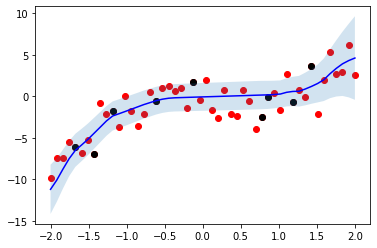

 88%|████████▊ | 8793/10000 [02:27<00:18, 64.77it/s]

Mean training loss at epoch 8800 :                         2.148
Mean Validation loss after 8800 equals                     2.228

Validation loss for the function plotted:                 2.228


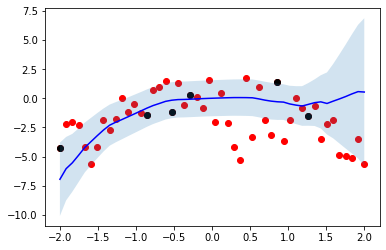

 89%|████████▉ | 8895/10000 [02:29<00:16, 66.13it/s]

Mean training loss at epoch 8900 :                         2.29
Mean Validation loss after 8900 equals                     2.453

Validation loss for the function plotted:                 2.453


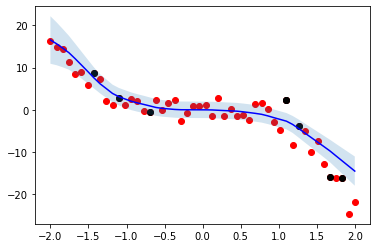

 90%|████████▉ | 8994/10000 [02:31<00:14, 67.48it/s]

Mean training loss at epoch 9000 :                         2.161
Mean Validation loss after 9000 equals                     2.459

Validation loss for the function plotted:                 2.459


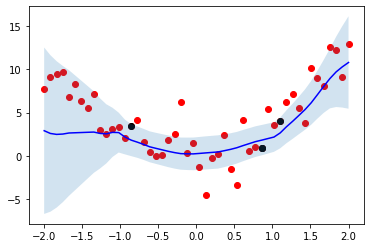

 91%|█████████ | 9100/10000 [02:32<00:13, 67.34it/s]

Mean training loss at epoch 9100 :                         2.124
Mean Validation loss after 9100 equals                     2.349

Validation loss for the function plotted:                 2.349


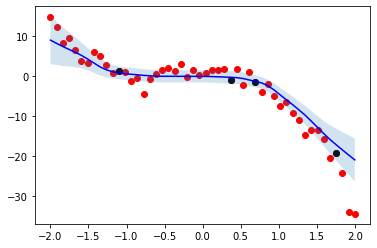

 92%|█████████▏| 9194/10000 [02:34<00:12, 64.66it/s]

Mean training loss at epoch 9200 :                         2.144
Mean Validation loss after 9200 equals                     2.64

Validation loss for the function plotted:                 2.64


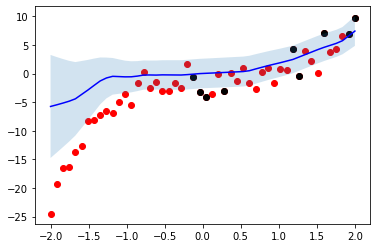

 93%|█████████▎| 9297/10000 [02:36<00:11, 59.20it/s]

Mean training loss at epoch 9300 :                         2.167
Mean Validation loss after 9300 equals                     2.294

Validation loss for the function plotted:                 2.294


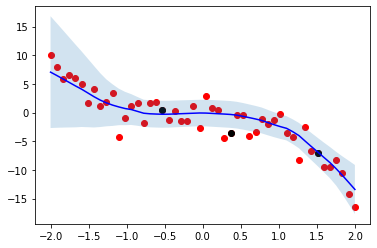

 94%|█████████▍| 9399/10000 [02:38<00:10, 58.50it/s]

Mean training loss at epoch 9400 :                         2.195
Mean Validation loss after 9400 equals                     2.348

Validation loss for the function plotted:                 2.348


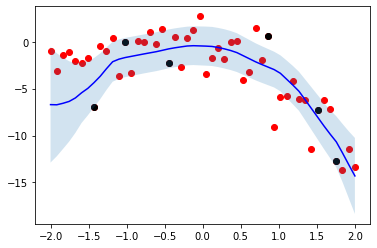

 95%|█████████▍| 9497/10000 [02:40<00:08, 56.55it/s]

Mean training loss at epoch 9500 :                         2.21
Mean Validation loss after 9500 equals                     2.098

Validation loss for the function plotted:                 2.098


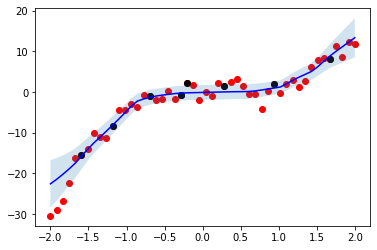

 96%|█████████▌| 9599/10000 [02:42<00:06, 64.21it/s]

Mean training loss at epoch 9600 :                         2.121
Mean Validation loss after 9600 equals                     2.277

Validation loss for the function plotted:                 2.277


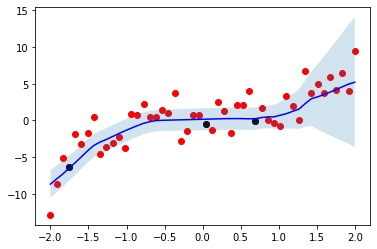

 97%|█████████▋| 9698/10000 [02:44<00:06, 46.57it/s]

Mean training loss at epoch 9700 :                         2.351
Mean Validation loss after 9700 equals                     2.28

Validation loss for the function plotted:                 2.28


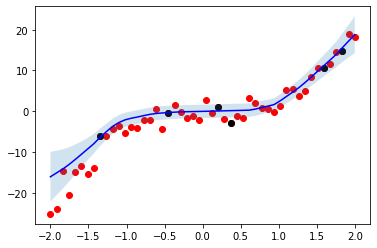

 98%|█████████▊| 9799/10000 [02:45<00:03, 59.92it/s]

Mean training loss at epoch 9800 :                         2.394
Mean Validation loss after 9800 equals                     2.381

Validation loss for the function plotted:                 2.381


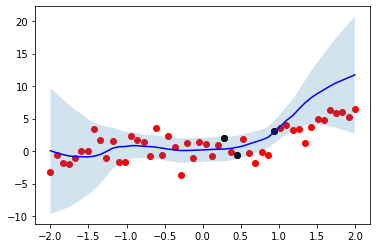

 99%|█████████▉| 9895/10000 [02:47<00:01, 60.12it/s]

Mean training loss at epoch 9900 :                         2.169
Mean Validation loss after 9900 equals                     2.597

Validation loss for the function plotted:                 2.597


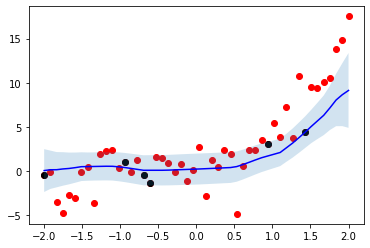

100%|██████████| 10000/10000 [02:49<00:00, 59.00it/s]


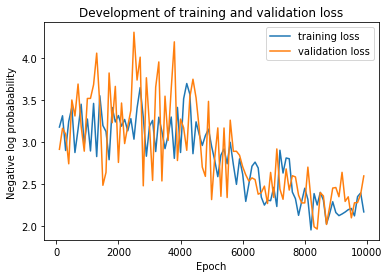

In [33]:
with open(os.path.join(config_dir,'1d_polynomial_compare_simple_aggregation.json')) as f:
    file = f.read()
    default_conf = json.loads(file)

# checking whether CUDA is available 
train_on_gpu = torch.cuda.is_available()
if(train_on_gpu):
    print('Training on GPU!')
    default_conf['experiment_params']['train_on_gpu'] = True
else: 
    print('No GPU available, training on CPU')
    default_conf['experiment_params']['train_on_gpu'] = False

    
    
    
CondNeuralProcess = RegressionCNP(**default_conf['cnp_params'])
trainer = RegressionTrainer(
    cnp=CondNeuralProcess,
    data_kwargs=default_conf['data_kwargs'],
    **default_conf['experiment_params'])
state_dict_encoder, state_dict_decoder, state_dict_aggregator, train_loss, vali_loss = trainer.run_training(
    batch_size_train=default_conf['train_kwargs']['batch_size_train'],
    batch_size_vali=default_conf['train_kwargs']['batch_size_vali'],
    print_after=default_conf['train_kwargs']['print_after'])

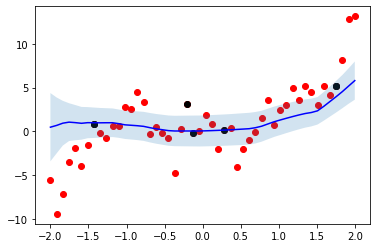

10.7975435256958


In [37]:
MSE = trainer.run_test(encoder_state_dict=state_dict_encoder,
              decoder_state_dict=state_dict_decoder,
              aggregator_state_dict=state_dict_aggregator,
              batch_size_test=default_conf['train_kwargs']['batch_size_test'])
print(MSE)

In [38]:
values = [state_dict_encoder, state_dict_decoder, state_dict_aggregator, train_loss, vali_loss]
names = ['encoder', 'decoder', 'aggregator', 'train_loss', 'vali_loss', 'mse']
to_save = [(name, value) for name, value in zip(names, values)]
directory = os.path.join(BASE_DIR,'experiments/results')


Helper.save_results(directory, '1d_polynomial_paper_setting_simple_sum', to_save)

In [82]:
trainer = RegressionTrainer(
    cnp=CondNeuralProcess,
    data_kwargs=default_conf['single_function']['data_kwargs'],
    **default_conf['single_function']['experiment_params'])
                         

In [14]:
state_dict_encoder, state_dict_decoder, state_dict_aggregator = trainer.run_training(
    batch_size_train=default_conf['single_function']['train_kwargs']['batch_size_train'],
    batch_size_vali=default_conf['single_function']['train_kwargs']['batch_size_vali'],
    print_after=default_conf['single_function']['train_kwargs']['print_after'])

KeyError: 'single_function'

In [47]:
default_conf['single_function']['data_kwargs']['datagenerator']